<a href="https://colab.research.google.com/github/Badar97/Progetto_DataScience/blob/main/Analisi_Descrittiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 ANALISI DESCRITTIVA**

## **1.1 Inizializzazione**

In [71]:
! git clone 'https://github.com/Badar97/Progetto_DataScience'

fatal: destination path 'Progetto_DataScience' already exists and is not an empty directory.


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyshp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import random

import geopandas as gpd
from shapely.geometry import shape, mapping, Point, Polygon, MultiPolygon
import fiona
import shapefile
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

In [72]:
url = "https://raw.githubusercontent.com/Badar97/Progetto_DataScience/main/Python/NorwayMeteoDataCompleted.csv"
meteo = pd.read_csv(url)
meteo#.head()

Unnamed: 0   sourceId   latitude  longtitude  \
0                0      SN100  61.134900   12.503900   
1                1     SN1135  58.990000   11.540800   
2                2  SN1151800  50.100278   14.255556   
3                3    SN15262  61.674000    8.368500   
4                4  SN1531000  45.473056   28.032222   
...            ...        ...        ...         ...   
237624      237624    SN50110  60.337200    6.217500   
237625      237625    SN98978  70.335700   28.964800   
237626      237626   SN299300  60.301111   19.131389   
237627      237627    SN50110  60.337200    6.217500   
237628      237628    SN98978  70.335700   28.964800   

        max(air_temperature P1D)  max(relative_humidity P1D)  \
0                            NaN                         NaN   
1                            NaN                         NaN   
2                            NaN                         NaN   
3                            NaN                         NaN   
4                            NaN                         NaN   
...                          ...                         ...   
237624                       NaN                         NaN   
237625                    -11.25                        89.0   
237626                       NaN                         NaN   
237627                       NaN                         NaN   
237628                     -7.00                        94.0   

        max(wind_speed P1D)  mean(air_temperature P1D)  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   
...                     ...                        ...   
237624                  NaN                        NaN   
237625                  2.6                     -12.45   
237626                  NaN                        NaN   
237627                  NaN                        NaN   
237628                  NaN                     -10.90   

        mean(relative_humidity P1D)  mean(wind_speed P1D)  \
0                               NaN                   NaN   
1                               NaN                   NaN   
2                               NaN                   NaN   
3                               NaN                   NaN   
4                               NaN                   NaN   
...                             ...                   ...   
237624                          NaN                   NaN   
237625                         89.0                   1.8   
237626                          NaN                   NaN   
237627                          NaN                   NaN   
237628                         91.0                   NaN   

        sum(precipitation_amount P1D)  day  month  year  
0                                 0.4    1      1  2010  
1                                 NaN    1      1  2010  
2                                 NaN    1      1  2010  
3                                 NaN    1      1  2010  
4                                 NaN    1      1  2010  
...                               ...  ...    ...   ...  
237624                            NaN   29     12  2021  
237625                            NaN   29     12  2021  
237626                            NaN   30     12  2021  
237627                            NaN   30     12  2021  
237628                            NaN   30     12  2021  

[237629 rows x 14 columns]

In [73]:
dropp = ['Unnamed: 0']
meteo.drop(dropp, inplace=True, axis=1)
meteo.head()

sourceId   latitude  longtitude  max(air_temperature P1D)  \
0      SN100  61.134900   12.503900                       NaN   
1     SN1135  58.990000   11.540800                       NaN   
2  SN1151800  50.100278   14.255556                       NaN   
3    SN15262  61.674000    8.368500                       NaN   
4  SN1531000  45.473056   28.032222                       NaN   

   max(relative_humidity P1D)  max(wind_speed P1D)  mean(air_temperature P1D)  \
0                         NaN                  NaN                        NaN   
1                         NaN                  NaN                        NaN   
2                         NaN                  NaN                        NaN   
3                         NaN                  NaN                        NaN   
4                         NaN                  NaN                        NaN   

   mean(relative_humidity P1D)  mean(wind_speed P1D)  \
0                          NaN                   NaN   
1                          NaN                   NaN   
2                          NaN                   NaN   
3                          NaN                   NaN   
4                          NaN                   NaN   

   sum(precipitation_amount P1D)  day  month  year  
0                            0.4    1      1  2010  
1                            NaN    1      1  2010  
2                            NaN    1      1  2010  
3                            NaN    1      1  2010  
4                            NaN    1      1  2010

In [74]:
meteo = meteo.dropna()
meteo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21799 entries, 34 to 235248
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sourceId                       21799 non-null  object 
 1   latitude                       21799 non-null  float64
 2   longtitude                     21799 non-null  float64
 3   max(air_temperature P1D)       21799 non-null  float64
 4   max(relative_humidity P1D)     21799 non-null  float64
 5   max(wind_speed P1D)            21799 non-null  float64
 6   mean(air_temperature P1D)      21799 non-null  float64
 7   mean(relative_humidity P1D)    21799 non-null  float64
 8   mean(wind_speed P1D)           21799 non-null  float64
 9   sum(precipitation_amount P1D)  21799 non-null  float64
 10  day                            21799 non-null  int64  
 11  month                          21799 non-null  int64  
 12  year                           21799 non-nul

In [75]:
meteo.shape

(21799, 13)

In [76]:
meteo.columns

Index(['sourceId', 'latitude', 'longtitude', 'max(air_temperature P1D)',
       'max(relative_humidity P1D)', 'max(wind_speed P1D)',
       'mean(air_temperature P1D)', 'mean(relative_humidity P1D)',
       'mean(wind_speed P1D)', 'sum(precipitation_amount P1D)', 'day', 'month',
       'year'],
      dtype='object')

In [77]:
newname = {'sourceId': 'sourceID', 'latitude': 'Latitude', 'longtitude': 'Longitude',
           'max(air_temperature P1D)': 'max_air_temp_perday', 'max(relative_humidity P1D)': 'max_rel_hum_perday', 
           'max(wind_speed P1D)': 'max_wind_speed_perday','mean(air_temperature P1D)': 'mean_air_temp_perday',
           'mean(relative_humidity P1D)': 'mean_rel_hum_perday', 'mean(wind_speed P1D)': 'mean_wind_speed_perday', 
           'sum(precipitation_amount P1D)': 'sum_precip_amount_perday', 'day': 'Day', 'month': 'Month', 'year': 'Year'}
meteo.rename(columns=newname, inplace=True)
meteo.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


sourceID  Latitude  Longitude  max_air_temp_perday  max_rel_hum_perday  \
34  SN69100   63.4597    10.9305                 -2.3                83.0   
40  SN91380   69.3875    20.2823                 -9.2                86.0   
41  SN91740   69.7887    20.9553                 -8.4                72.0   
80  SN69100   63.4597    10.9305                -13.4                84.0   
86  SN91380   69.3875    20.2823                 -8.7                79.0   

    max_wind_speed_perday  mean_air_temp_perday  mean_rel_hum_perday  \
34                    4.1                 -8.50                 79.0   
40                    5.1                -11.75                 71.0   
41                    8.9                -10.90                 67.0   
80                    4.6                -15.15                 82.0   
86                    3.3                -12.35                 73.0   

    mean_wind_speed_perday  sum_precip_amount_perday  Day  Month  Year  
34                     3.0                      0.00    1      1  2010  
40                     2.6                      0.30    1      1  2010  
41                     6.9                      0.00    1      1  2010  
80                     3.6                      0.00    2      1  2010  
86                     2.3                      0.15    2      1  2010

In [78]:
cols=['Year', 'Month', 'Day']
meteo['Date'] = meteo[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
meteo['Date']=pd.to_datetime(meteo['Date'])
#meteo.drop(cols, inplace=True, axis=1)
meteo.head()

<ipython-input-78-48aef3612a97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meteo['Date'] = meteo[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
<ipython-input-78-48aef3612a97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meteo['Date']=pd.to_datetime(meteo['Date'])


sourceID  Latitude  Longitude  max_air_temp_perday  max_rel_hum_perday  \
34  SN69100   63.4597    10.9305                 -2.3                83.0   
40  SN91380   69.3875    20.2823                 -9.2                86.0   
41  SN91740   69.7887    20.9553                 -8.4                72.0   
80  SN69100   63.4597    10.9305                -13.4                84.0   
86  SN91380   69.3875    20.2823                 -8.7                79.0   

    max_wind_speed_perday  mean_air_temp_perday  mean_rel_hum_perday  \
34                    4.1                 -8.50                 79.0   
40                    5.1                -11.75                 71.0   
41                    8.9                -10.90                 67.0   
80                    4.6                -15.15                 82.0   
86                    3.3                -12.35                 73.0   

    mean_wind_speed_perday  sum_precip_amount_perday  Day  Month  Year  \
34                     3.0                      0.00    1      1  2010   
40                     2.6                      0.30    1      1  2010   
41                     6.9                      0.00    1      1  2010   
80                     3.6                      0.00    2      1  2010   
86                     2.3                      0.15    2      1  2010   

         Date  
34 2010-01-01  
40 2010-01-01  
41 2010-01-01  
80 2010-01-02  
86 2010-01-02

## **1.2 Quantità di dati in base al sourceID**

In [79]:
elem = meteo.sourceID.value_counts().count()
print('num of sourceID is: '+str(elem))
meteo['sourceID'].value_counts()


num of sourceID is: 7


SN69100    4360
SN61630    4325
SN91380    4207
SN91740    3222
SN16400    2472
SN32240    1833
SN50110    1380
Name: sourceID, dtype: int64

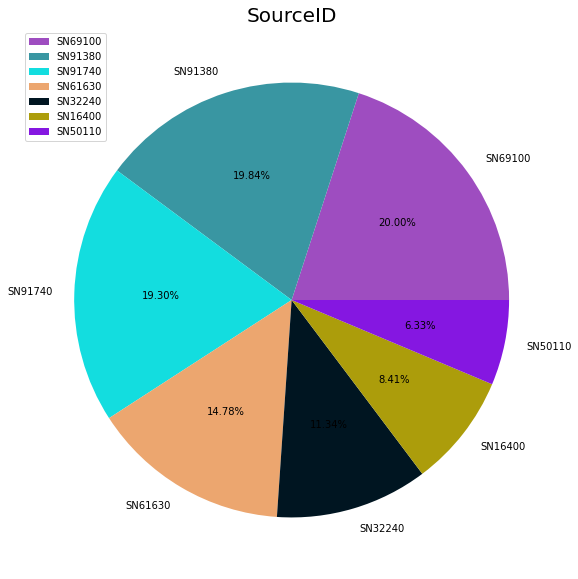

In [80]:
arr = meteo['sourceID'].unique()
labels = arr.tolist()

size = meteo['sourceID'].value_counts()
colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]

plt.figure(figsize=(10,10))
plt.pie(size, colors=colors(7), labels=labels, autopct='%.2f%%')
plt.title('SourceID', fontsize=20)
plt.axis('off')
plt.legend()
plt.show(block=False)
plt.pause(3)
plt.close()

## **1.3 Mappe**

In [81]:
geometry = [Point(xy) for xy in zip(meteo.Longitude, meteo.Latitude)]
meteo['geometry'] = geometry
crs = {'init': 'epsg:4326'}
meteo_locs = gpd.GeoDataFrame(meteo, crs=crs, geometry=geometry)
meteo_locs.head()

<ipython-input-81-193c6373cca3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meteo['geometry'] = geometry
/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


sourceID  Latitude  Longitude  max_air_temp_perday  max_rel_hum_perday  \
34  SN69100   63.4597    10.9305                 -2.3                83.0   
40  SN91380   69.3875    20.2823                 -9.2                86.0   
41  SN91740   69.7887    20.9553                 -8.4                72.0   
80  SN69100   63.4597    10.9305                -13.4                84.0   
86  SN91380   69.3875    20.2823                 -8.7                79.0   

    max_wind_speed_perday  mean_air_temp_perday  mean_rel_hum_perday  \
34                    4.1                 -8.50                 79.0   
40                    5.1                -11.75                 71.0   
41                    8.9                -10.90                 67.0   
80                    4.6                -15.15                 82.0   
86                    3.3                -12.35                 73.0   

    mean_wind_speed_perday  sum_precip_amount_perday  Day  Month  Year  \
34                     3.0                      0.00    1      1  2010   
40                     2.6                      0.30    1      1  2010   
41                     6.9                      0.00    1      1  2010   
80                     3.6                      0.00    2      1  2010   
86                     2.3                      0.15    2      1  2010   

         Date                   geometry  
34 2010-01-01  POINT (10.93050 63.45970)  
40 2010-01-01  POINT (20.28230 69.38750)  
41 2010-01-01  POINT (20.95530 69.78870)  
80 2010-01-02  POINT (10.93050 63.45970)  
86 2010-01-02  POINT (20.28230 69.38750)

In [82]:
area_shp = gpd.read_file('Progetto_DataScience/Python/ShapeFiles/norwshape/norw.shp')
city_shp = gpd.read_file('Progetto_DataScience/Python/ShapeFiles/norwayshp/NOR_adm2.shp')
#area_shp

### **1.3.1  Mappa Generale**

In [83]:
coord = meteo['geometry'].unique()
sorid = meteo['sourceID'].unique()
fc = fiona.open("Progetto_DataScience/Python/ShapeFiles/norwshape/norw.shp")
#print(fc.schema)
src_region = []
sid = []
for feature in fc:
    if shape(feature['geometry']).contains(coord[0]):
          #print('for p0: '+ feature['properties']['name_1'], coord[0], sorid[0])
          src_region.append(feature['properties']['name_1'])
          sid.append(sorid[0])
    if shape(feature['geometry']).contains(coord[1]):
          #print('for p1: '+ feature['properties']['name_1'], coord[1], sorid[1])
          src_region.append(feature['properties']['name_1'])
          sid.append(sorid[1])
    if shape(feature['geometry']).contains(coord[2]):
          #print('for p2: '+ feature['properties']['name_1'], coord[2], sorid[2])
          src_region.append(feature['properties']['name_1'])
          sid.append(sorid[2])
    if shape(feature['geometry']).contains(coord[3]):
          #print('for p3: '+ feature['properties']['name_1'], coord[3], sorid[3])
          src_region.append(feature['properties']['name_1'])
          sid.append(sorid[3])
    if shape(feature['geometry']).contains(coord[4]):
          #print('for p4: '+ feature['properties']['name_1'], coord[4], sorid[4])
          src_region.append(feature['properties']['name_1'])
          sid.append(sorid[4])
    if shape(feature['geometry']).contains(coord[5]):
          #print('for p5: '+ feature['properties']['name_1'], coord[5], sorid[5])
          src_region.append(feature['properties']['name_1'])
          sid.append(sorid[5])
    if shape(feature['geometry']).contains(coord[6]):
          #print('for p6: '+ feature['properties']['name_1'], coord[6], sorid[6])
          src_region.append(feature['properties']['name_1'])
          sid.append(sorid[6])

print(src_region)
print(sid)
reg = [*set(src_region)] #remove duplicate
#print(reg)

['Hordaland', 'Nord-Trøndelag', 'Oppland', 'Oppland', 'Telemark', 'Troms', 'Troms']
['SN50110', 'SN69100', 'SN61630', 'SN16400', 'SN32240', 'SN91380', 'SN91740']


In [84]:
coord_1 = meteo['geometry'].unique()
sorid_1 = meteo['sourceID'].unique()
fc_1 = fiona.open("Progetto_DataScience/Python/ShapeFiles/norwayshp/NOR_adm2.shp")
#print(fc_1.schema)
src_region_1 = []
sid_1 = []
for feature in fc_1:
    if shape(feature['geometry']).contains(coord_1[0]):
          #print('for p0: '+ feature['properties']['NAME_2'], coord_1[0], sorid_1[0])
          src_region_1.append(feature['properties']['NAME_2'])
          sid_1.append(sorid_1[0])
    if shape(feature['geometry']).contains(coord_1[1]):
          #print('for p1: '+ feature['properties']['NAME_2'], coord_1[1], sorid_1[1])
          src_region_1.append(feature['properties']['NAME_2'])
          sid_1.append(sorid_1[1])
    if shape(feature['geometry']).contains(coord_1[2]):
          #print('for p2: '+ feature['properties']['NAME_2'], coord_1[2], sorid_1[2])
          src_region_1.append(feature['properties']['NAME_2'])
          sid_1.append(sorid_1[2])
    if shape(feature['geometry']).contains(coord_1[3]):
          #print('for p3: '+ feature['properties']['NAME_2'], coord_1[3], sorid_1[3])
          src_region_1.append(feature['properties']['NAME_2'])
          sid_1.append(sorid_1[3])
    if shape(feature['geometry']).contains(coord_1[4]):
          #print('for p4: '+ feature['properties']['NAME_2'], coord_1[4], sorid_1[4])
          src_region_1.append(feature['properties']['NAME_2'])
          sid_1.append(sorid_1[4])
    if shape(feature['geometry']).contains(coord_1[5]):
          #print('for p5: '+ feature['properties']['NAME_2'], coord_1[5], sorid_1[5])
          src_region_1.append(feature['properties']['NAME_2'])
          sid_1.append(sorid_1[5])
    if shape(feature['geometry']).contains(coord_1[6]):
          #print('for p6: '+ feature['properties']['NAME_2'], coord_1[6], sorid_1[6])
          src_region_1.append(feature['properties']['NAME_2'])
          sid_1.append(sorid_1[6])

print(src_region_1)
print(sid_1)
reg_1 = [*set(src_region_1)] #remove duplicate
#print(reg)

['Kvam', 'Stjørdal', 'Dovre', 'Lesja', 'Bø', 'Nordreisa', 'Storfjord']
['SN50110', 'SN69100', 'SN16400', 'SN61630', 'SN32240', 'SN91740', 'SN91380']


In [85]:
city_sourceid = pd.DataFrame(np.column_stack([sid_1, src_region_1]), 
                               columns=['sourceID', 'city'])
city_sourceid

sourceID       city
0  SN50110       Kvam
1  SN69100   Stjørdal
2  SN16400      Dovre
3  SN61630      Lesja
4  SN32240         Bø
5  SN91740  Nordreisa
6  SN91380  Storfjord

In [86]:
geo_df = area_shp[['name_1', 'hasc_1', 'geometry']]
geo_df.columns = ['region', 'region_code', 'geometry']

city_df = city_shp[['NAME_1', 'NAME_2', 'geometry']]
city_df.columns = ['region', 'city', 'geometry']


In [87]:
geo_df_rid = geo_df[geo_df['region'].isin(reg)]
geo_df_rid
#geo_df_rid.plot(figsize=(8, 8), edgecolor='black', linewidth=1, color='lightblue')

region region_code  \
6        Hordaland       NO.HO   
8   Nord-Trøndelag       NO.NT   
10         Oppland       NO.OP   
15        Telemark       NO.TE   
16           Troms       NO.TR   

                                             geometry  
6   MULTIPOLYGON (((5.14028 59.52097, 5.14028 59.5...  
8   MULTIPOLYGON (((10.90417 63.46875, 10.90417 63...  
10  POLYGON ((10.71407 60.51467, 10.71278 60.51912...  
15  MULTIPOLYGON (((9.46028 58.82153, 9.46028 58.8...  
16  MULTIPOLYGON (((17.00417 68.71458, 17.00208 68...

In [88]:
city_df_rid = city_df[city_df['city'].isin(reg_1)]
city_df_rid = city_df_rid.drop(labels=219, axis=0)
city_df_rid
#city_df_rid.plot(figsize=(8, 8), edgecolor='black', linewidth=1, color='lightblue')

region       city  \
134       Hordaland       Kvam   
212  Nord-Trøndelag   Stjørdal   
264         Oppland      Dovre   
270         Oppland      Lesja   
365        Telemark         Bø   
399           Troms  Nordreisa   
404           Troms  Storfjord   

                                              geometry  
134  MULTIPOLYGON (((6.19792 60.32292, 6.19583 60.3...  
212  MULTIPOLYGON (((10.94624 63.33144, 10.94484 63...  
264  POLYGON ((9.30370 61.88652, 9.30215 61.89095, ...  
270  POLYGON ((8.57173 62.00565, 8.56230 62.00488, ...  
365  POLYGON ((8.86936 59.34920, 8.87805 59.34995, ...  
399  MULTIPOLYGON (((22.26001 69.47374, 22.25954 69...  
404  POLYGON ((20.06260 69.04608, 20.05008 69.04608...

/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


Text(0.5, 1.0, 'Norway')

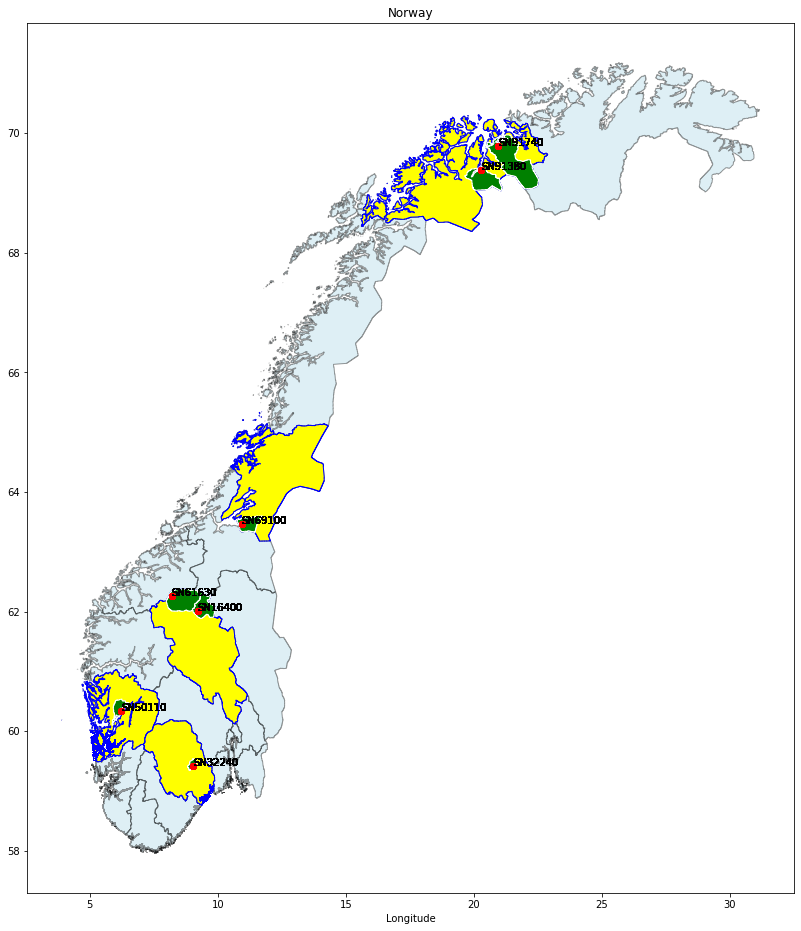

In [89]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

fig, ax = plt.subplots(figsize = (16,16))
area_shp.plot(column=area_shp.name_1, color='lightblue', ax=ax, alpha = 0.4, edgecolor='black')
geo_df_rid.plot(edgecolor='blue', ax=ax, linewidth=1, color='yellow')
city_df_rid.plot(edgecolor='white', ax=ax, linewidth=1, color='green')
#area_shp.apply(lambda x: ax.annotate(s=x['name_1'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
#meteo_locs.geometry.plot(marker='o', color='red', markersize=100, ax=ax, label = 'Locations of sourceID')
label_point(meteo.Longitude, meteo.Latitude, meteo.sourceID, meteo.set_index('Longitude')['Latitude'].plot(style='o', color='red', label=''))

plt.title('Norway')

### **1.3.2 Mappe per SourceID**

In [50]:
merged_df = pd.merge(left=city_df_rid, right=city_sourceid, how='left', left_on='city', right_on='city')
#merged_df = merged_df.drop(['regio', 'region_code'], axis=1)
merged_df

region       city  \
0       Hordaland       Kvam   
1  Nord-Trøndelag   Stjørdal   
2         Oppland      Dovre   
3         Oppland      Lesja   
4        Telemark         Bø   
5           Troms  Nordreisa   
6           Troms  Storfjord   

                                            geometry sourceID  
0  MULTIPOLYGON (((6.19792 60.32292, 6.19583 60.3...  SN50110  
1  MULTIPOLYGON (((10.94624 63.33144, 10.94484 63...  SN69100  
2  POLYGON ((9.30370 61.88652, 9.30215 61.89095, ...  SN16400  
3  POLYGON ((8.57173 62.00565, 8.56230 62.00488, ...  SN61630  
4  POLYGON ((8.86936 59.34920, 8.87805 59.34995, ...  SN32240  
5  MULTIPOLYGON (((22.26001 69.47374, 22.25954 69...  SN91740  
6  POLYGON ((20.06260 69.04608, 20.05008 69.04608...  SN91380

In [53]:
compl_df = pd.merge(left=merged_df, right=meteo, how='left', left_on='sourceID', right_on='sourceID')
#compl_df = compl_df.drop(['sourID'], axis=1)
compl_df.columns = compl_df.columns.str.replace('geometry_x', 'geometry')
compl_df.head(3)

region  city                                           geometry  \
0  Hordaland  Kvam  MULTIPOLYGON (((6.19792 60.32292, 6.19583 60.3...   
1  Hordaland  Kvam  MULTIPOLYGON (((6.19792 60.32292, 6.19583 60.3...   
2  Hordaland  Kvam  MULTIPOLYGON (((6.19792 60.32292, 6.19583 60.3...   

  sourceID  Latitude  Longitude  max_air_temp_perday  max_rel_hum_perday  \
0  SN50110   60.3372     6.2175                 15.7                90.0   
1  SN50110   60.3372     6.2175                 19.3                88.0   
2  SN50110   60.3372     6.2175                 16.2                90.0   

   max_wind_speed_perday  mean_air_temp_perday  mean_rel_hum_perday  \
0                    0.9                 12.45                 79.0   
1                    0.3                 12.15                 70.0   
2                    0.4                 13.50                 86.0   

   mean_wind_speed_perday  sum_precip_amount_perday  Day  Month  Year  \
0                     0.3                     11.75   29      6  2013   
1                     0.1                      0.00   30      6  2013   
2                     0.1                      0.00    1      7  2013   

                 geometry_y       Date  
0  POINT (6.21750 60.33720) 2013-06-29  
1  POINT (6.21750 60.33720) 2013-06-30  
2  POINT (6.21750 60.33720) 2013-07-01

#### **Temperatura Max al Giorno per SourceID**

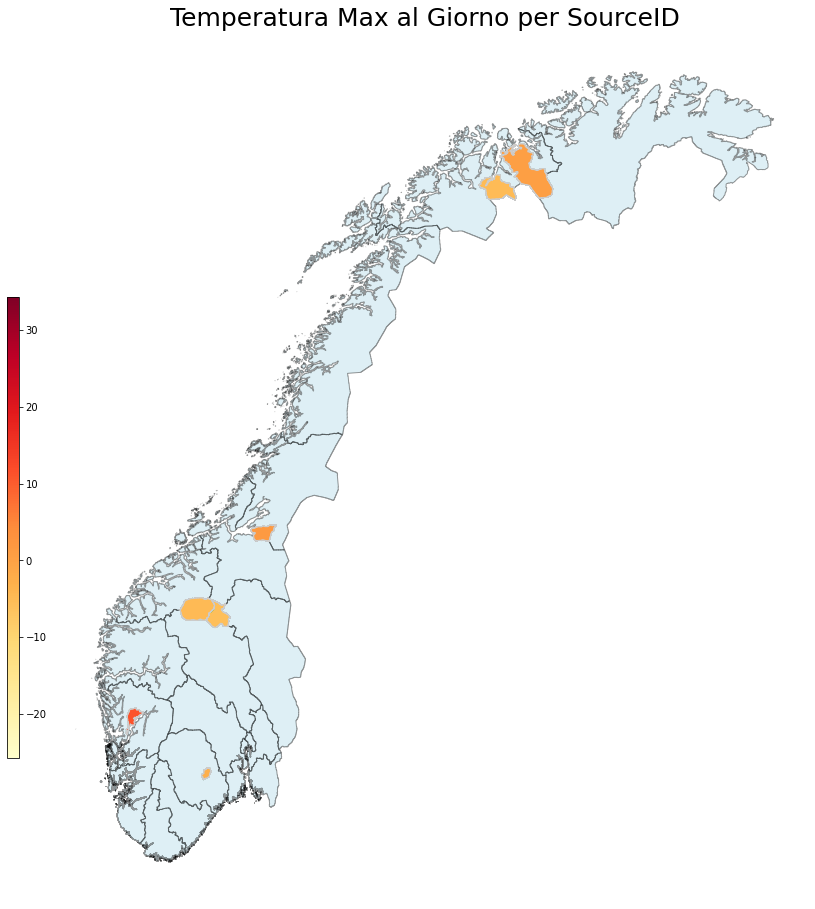

In [91]:
title = 'Temperatura Max al Giorno per SourceID'
col = 'max_air_temp_perday'
vmin = compl_df[col].min()
vmax = compl_df[col].max()
cmap = 'YlOrRd'

fig, ax = plt.subplots(1, figsize=(16, 16))
ax.axis('off')
area_shp.plot(column=area_shp.name_1, color='lightblue', ax=ax, alpha = 0.4, edgecolor='black')
compl_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
sm._A = []
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

#### **Umidità Relativa Max al Giorno per SourceID**

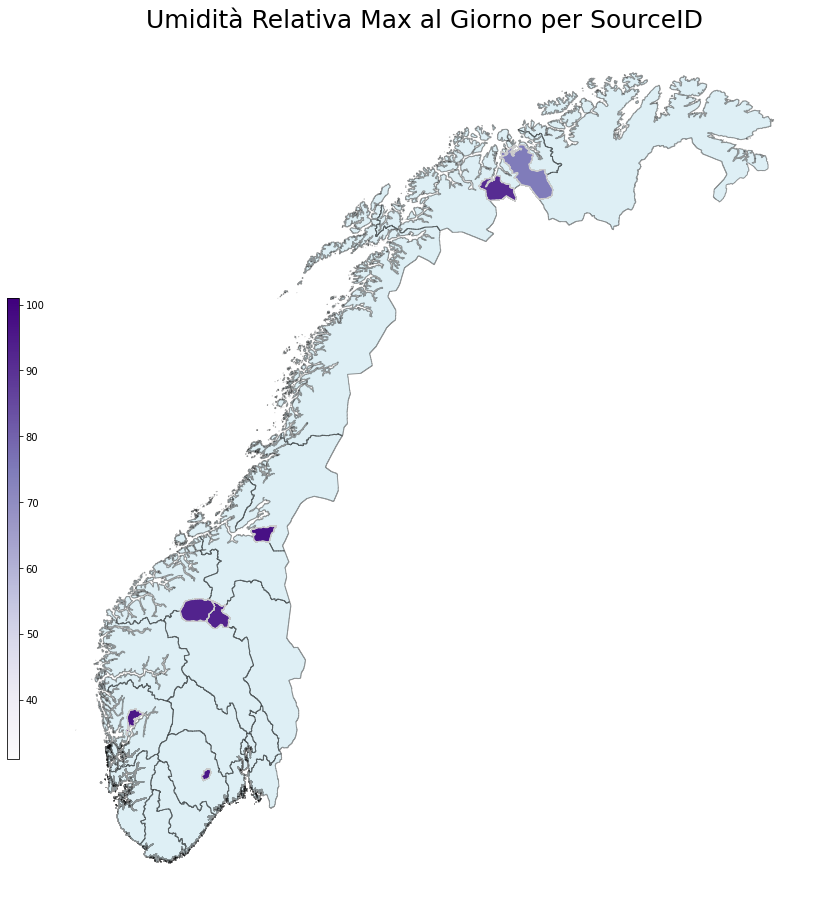

In [92]:
title = 'Umidità Relativa Max al Giorno per SourceID'
col = 'max_rel_hum_perday'
vmin = compl_df[col].min()
vmax = compl_df[col].max()
cmap = 'Purples'

fig, ax = plt.subplots(1, figsize=(16, 16))
ax.axis('off')
area_shp.plot(column=area_shp.name_1, color='lightblue', ax=ax, alpha = 0.4, edgecolor='black')
compl_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
sm._A = []
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

#### **Velocità del vento Max al Giorno per SourceID**

/usr/local/lib/python3.8/dist-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


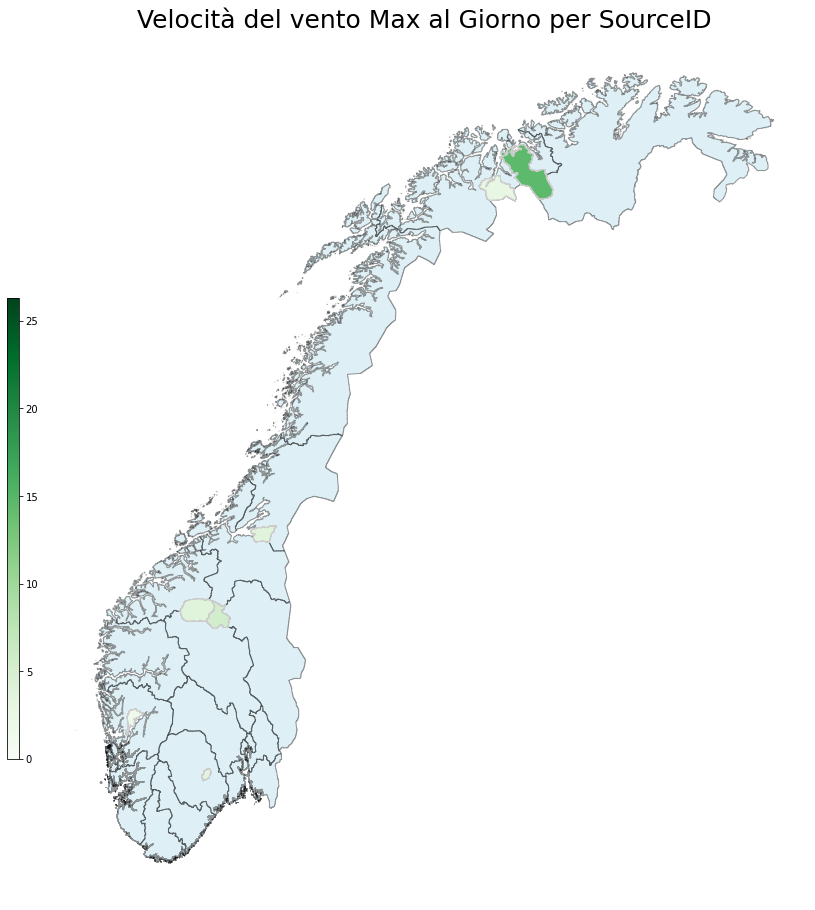

In [90]:
title = 'Velocità del vento Max al Giorno per SourceID'
col = 'max_wind_speed_perday'
vmin = compl_df[col].min()
vmax = compl_df[col].max()
cmap = 'Greens'

fig, ax = plt.subplots(1, figsize=(16, 16))
ax.axis('off')
area_shp.plot(column=area_shp.name_1, color='lightblue', ax=ax, alpha = 0.4, edgecolor='black')
compl_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
sm._A = []
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

#### **Precipitazioni Totali al Giorno per SourceID**

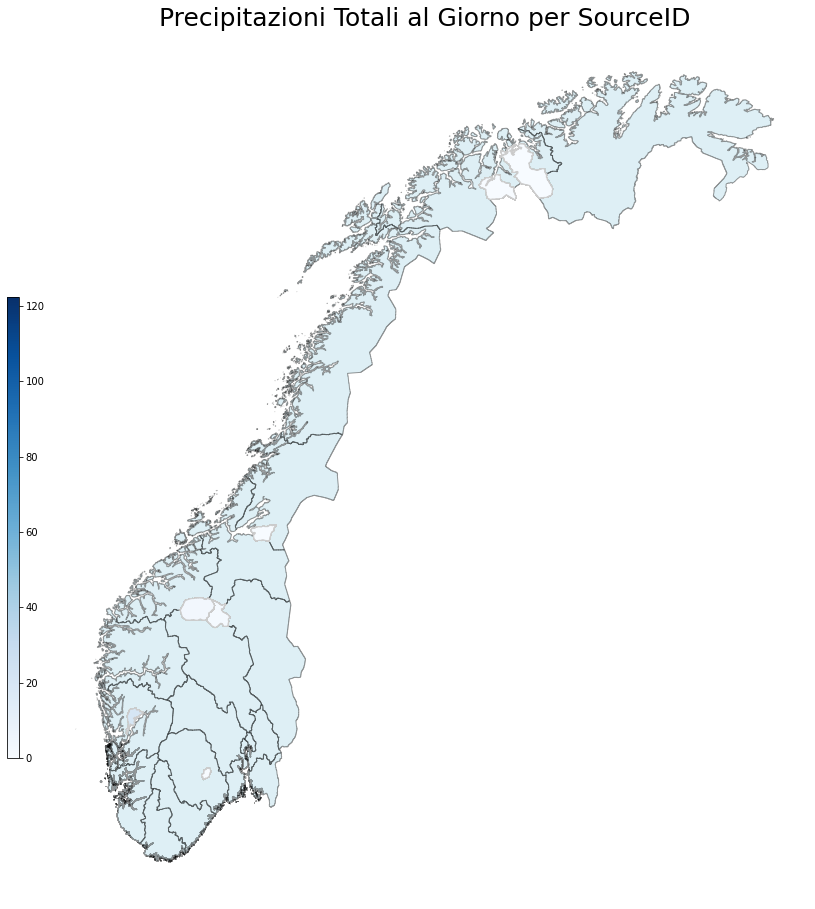

In [93]:
title = 'Precipitazioni Totali al Giorno per SourceID'
col = 'sum_precip_amount_perday'
vmin = compl_df[col].min()
vmax = compl_df[col].max()
cmap = 'Blues'

fig, ax = plt.subplots(1, figsize=(16, 16))
ax.axis('off')
area_shp.plot(column=area_shp.name_1, color='lightblue', ax=ax, alpha = 0.4, edgecolor='black')
compl_df.plot(column=col, ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'})
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
sm._A = []
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

## **1.4 Distribuzioni**

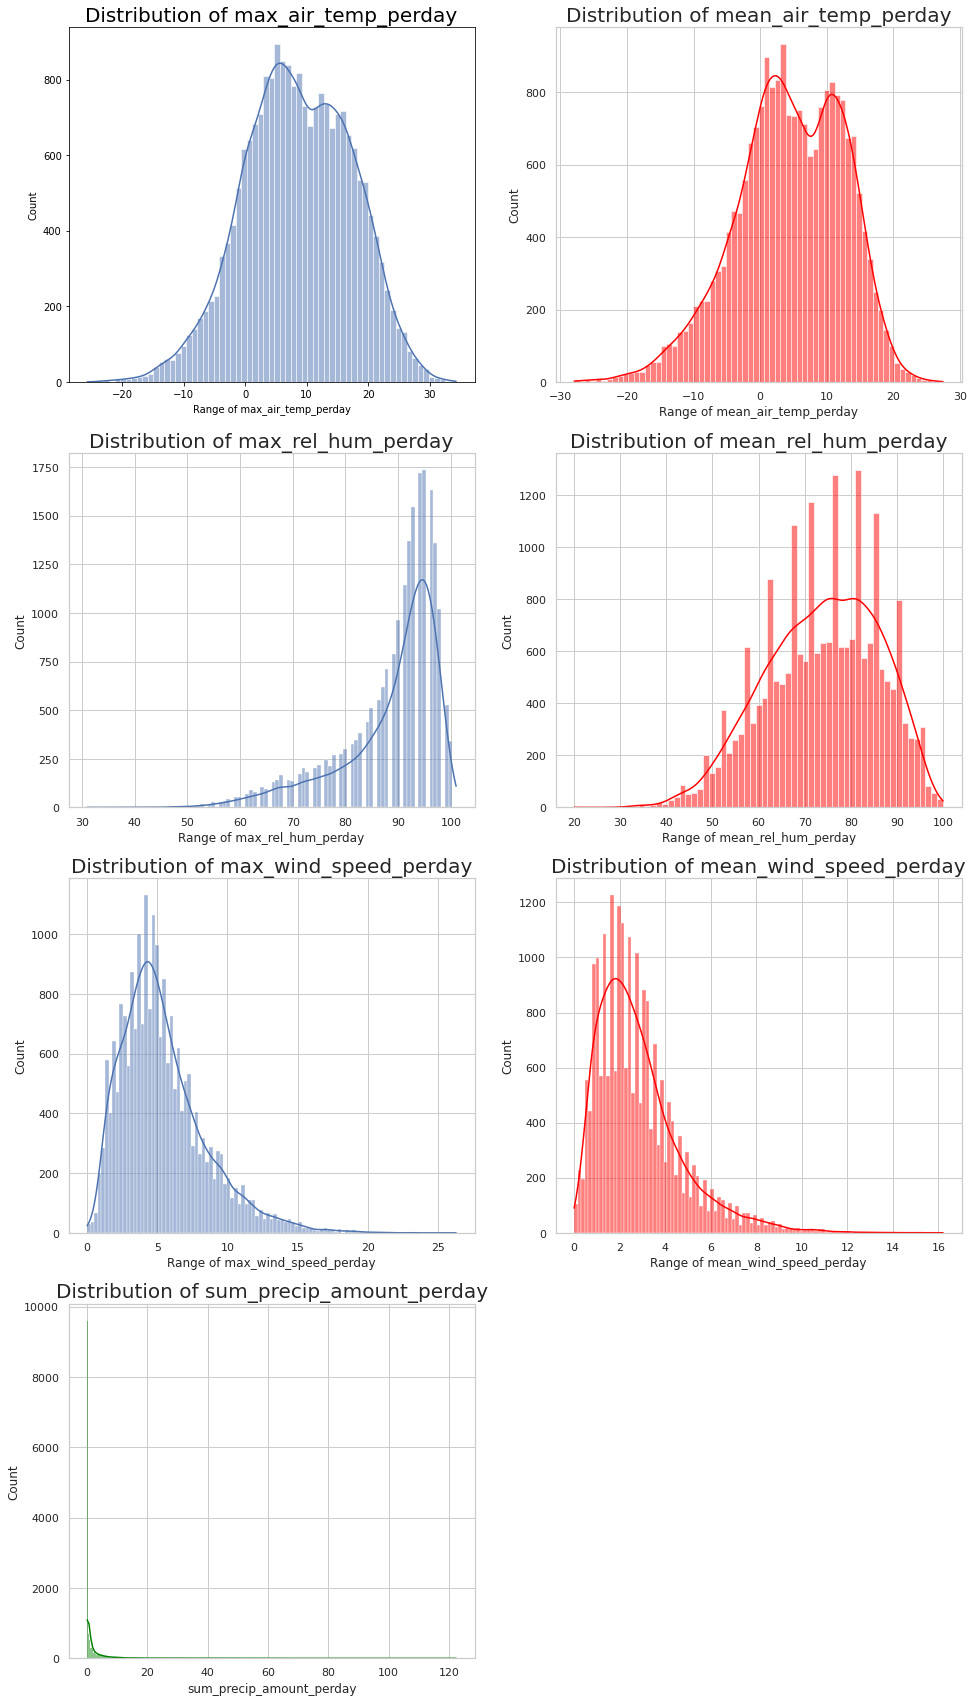

In [94]:
plt.figure(figsize=(16,30))
plt.subplot(4, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_air_temp_perday', kde=True)
plt.title('Distribution of max_air_temp_perday', fontsize = 20)
plt.xlabel('Range of max_air_temp_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_air_temp_perday', color = 'red', kde=True)
plt.title('Distribution of mean_air_temp_perday', fontsize = 20)
plt.xlabel('Range of mean_air_temp_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 3)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_rel_hum_perday', kde=True)
plt.title('Distribution of max_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of max_rel_hum_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 4)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_rel_hum_perday', color = 'red', kde=True)
plt.title('Distribution of mean_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of mean_rel_hum_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 5)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_wind_speed_perday', kde=True)
plt.title('Distribution of max_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of max_wind_speed_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 6)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_wind_speed_perday', color = 'red', kde=True)
plt.title('Distribution of mean_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of mean_wind_speed_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 7)
sns.histplot(meteo, x='sum_precip_amount_perday', color = 'green', kde=True)
plt.title('Distribution of sum_precip_amount_perday', fontsize = 20)

plt.show()

### **1.4.1 Distribuzioni per SN69100**

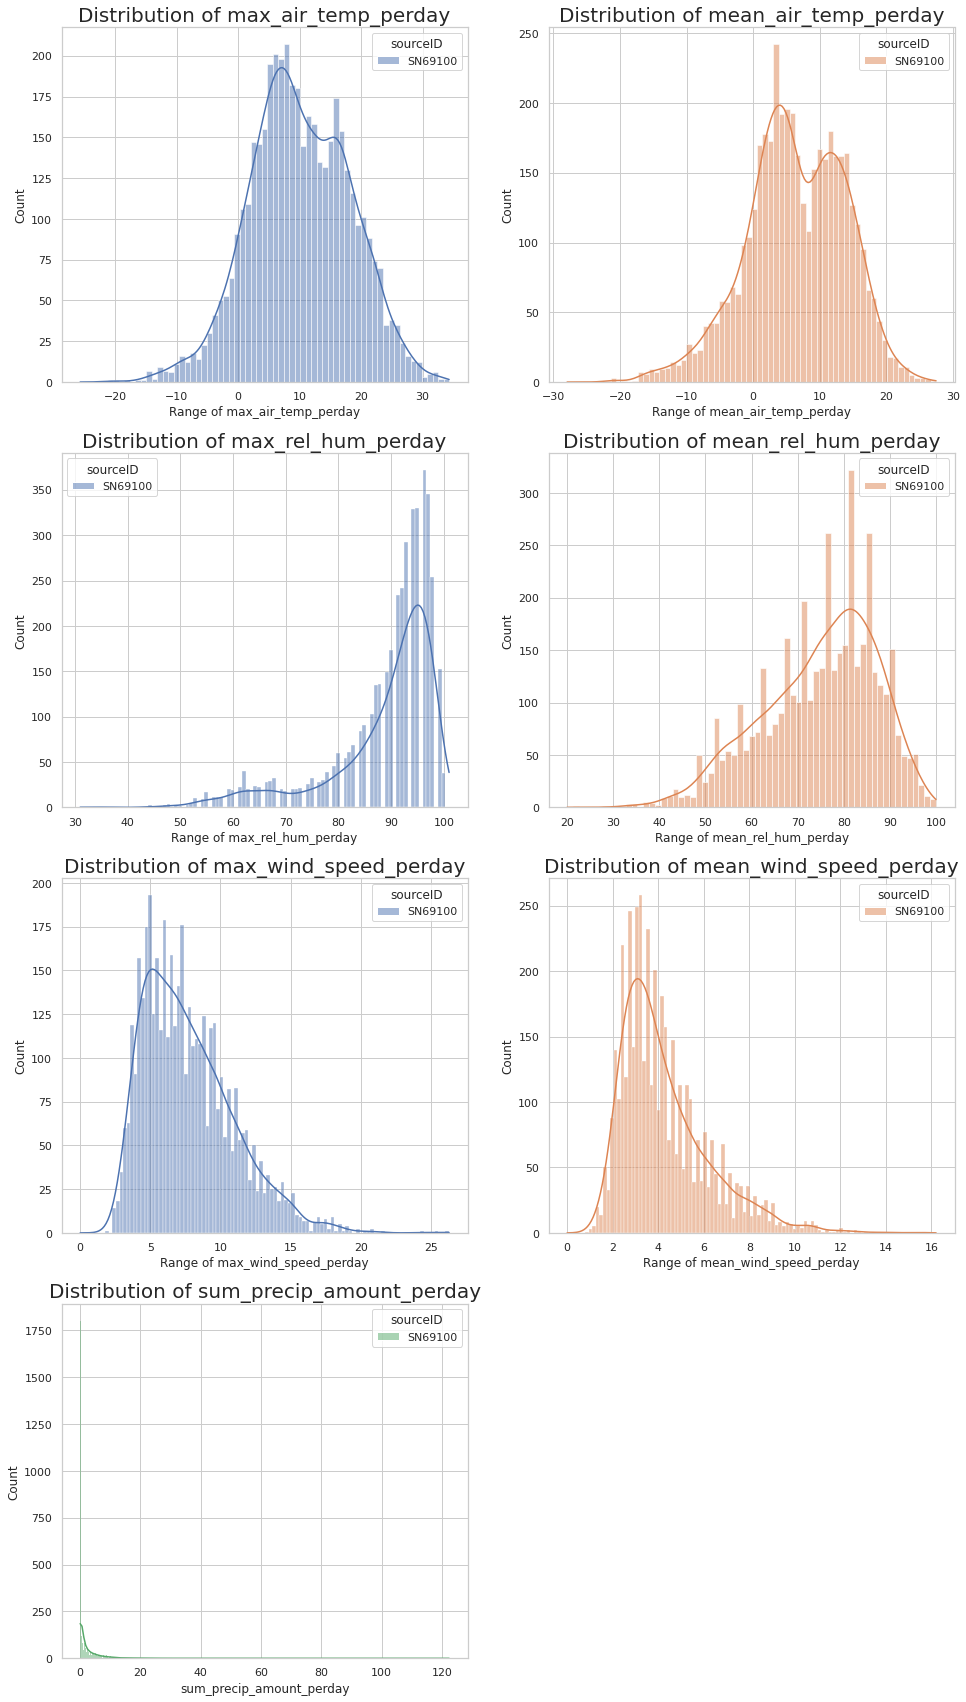

In [96]:
plt.figure(figsize=(16,30))

plt.subplot(4, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_air_temp_perday', kde=True, hue=('sourceID'), hue_order=['SN69100'])
plt.title('Distribution of max_air_temp_perday', fontsize = 20)
plt.xlabel('Range of max_air_temp_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_air_temp_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN69100'], palette=["C1"])
plt.title('Distribution of mean_air_temp_perday', fontsize = 20)
plt.xlabel('Range of mean_air_temp_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 3)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_rel_hum_perday', kde=True, hue=('sourceID'), hue_order=['SN69100'])
plt.title('Distribution of max_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of max_rel_hum_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 4)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_rel_hum_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN69100'], palette=["C1"])
plt.title('Distribution of mean_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of mean_rel_hum_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 5)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_wind_speed_perday', kde=True, hue=('sourceID'), hue_order=['SN69100'])
plt.title('Distribution of max_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of max_wind_speed_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 6)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_wind_speed_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN69100'], palette=["C1"])
plt.title('Distribution of mean_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of mean_wind_speed_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 7)
sns.histplot(meteo, x='sum_precip_amount_perday', kde=True, hue=('sourceID'), hue_order=['SN69100'], palette=["C2"])
plt.title('Distribution of sum_precip_amount_perday', fontsize = 20)

plt.show()

### **1.4.1 Distribuzioni per SN91380**

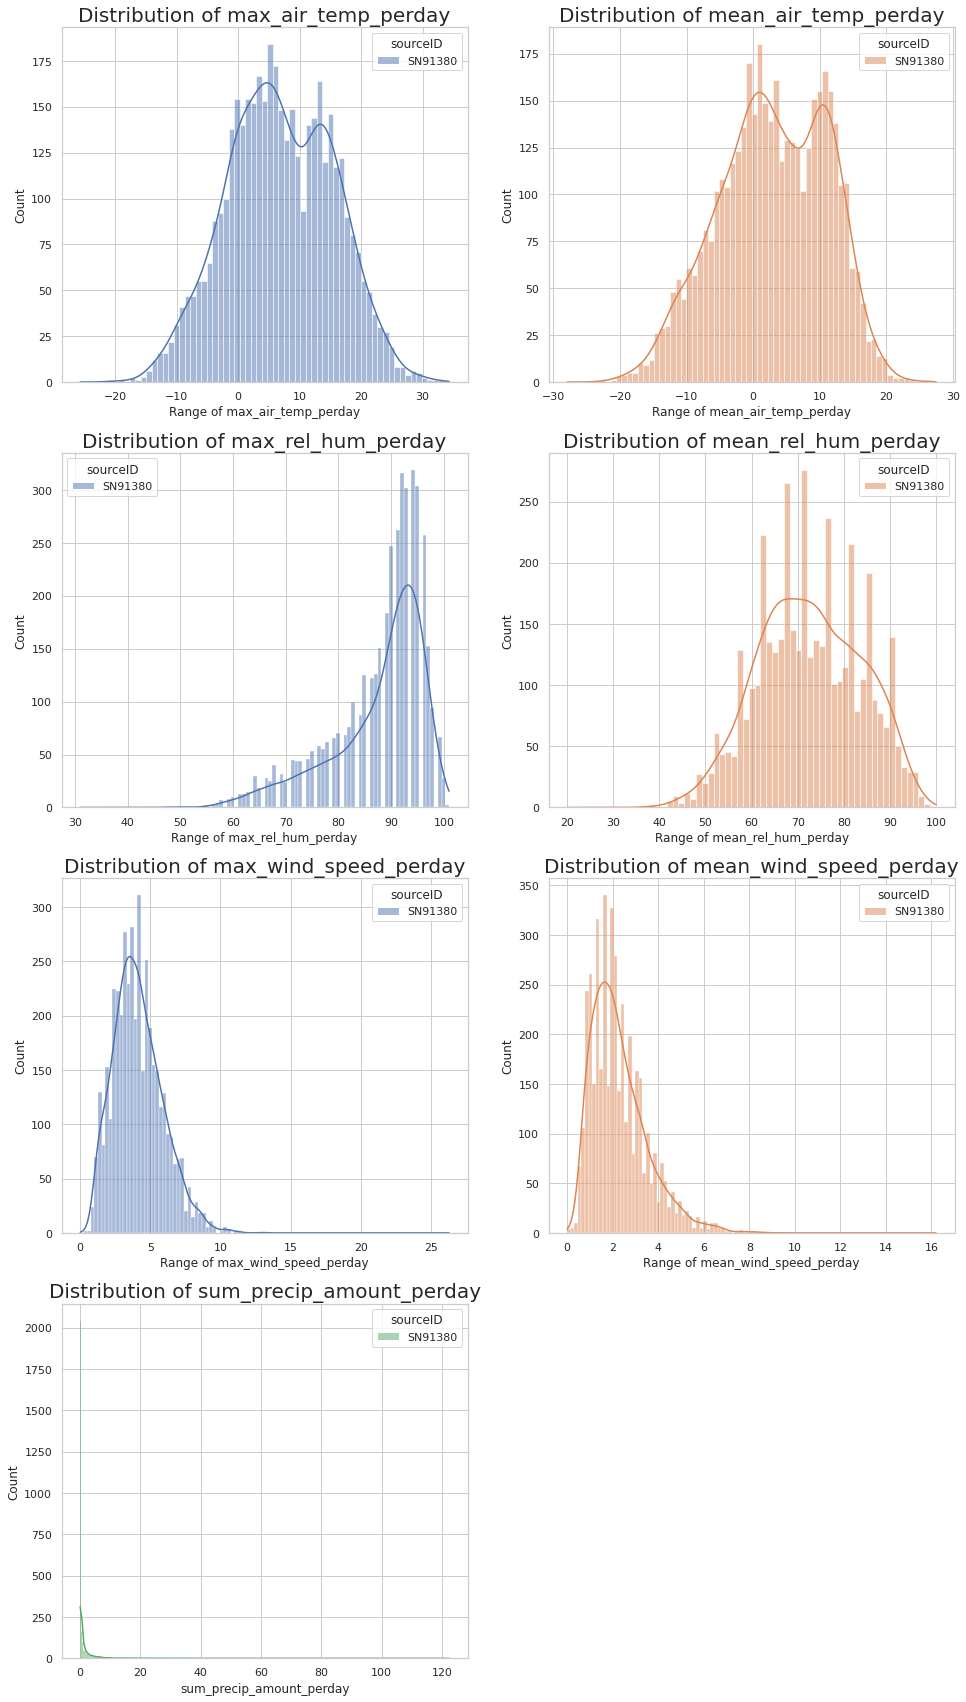

In [97]:
plt.figure(figsize=(16,30))

plt.subplot(4, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_air_temp_perday', kde=True, hue=('sourceID'), hue_order=['SN91380'])
plt.title('Distribution of max_air_temp_perday', fontsize = 20)
plt.xlabel('Range of max_air_temp_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_air_temp_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN91380'], palette=["C1"])
plt.title('Distribution of mean_air_temp_perday', fontsize = 20)
plt.xlabel('Range of mean_air_temp_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 3)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_rel_hum_perday', kde=True, hue=('sourceID'), hue_order=['SN91380'])
plt.title('Distribution of max_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of max_rel_hum_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 4)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_rel_hum_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN91380'], palette=["C1"])
plt.title('Distribution of mean_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of mean_rel_hum_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 5)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_wind_speed_perday', kde=True, hue=('sourceID'), hue_order=['SN91380'])
plt.title('Distribution of max_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of max_wind_speed_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 6)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_wind_speed_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN91380'], palette=["C1"])
plt.title('Distribution of mean_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of mean_wind_speed_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 7)
sns.histplot(meteo, x='sum_precip_amount_perday', kde=True, hue=('sourceID'), hue_order=['SN91380'], palette=["C2"])
plt.title('Distribution of sum_precip_amount_perday', fontsize = 20)

plt.show()

### **1.4.1 Distribuzioni per SN91740**

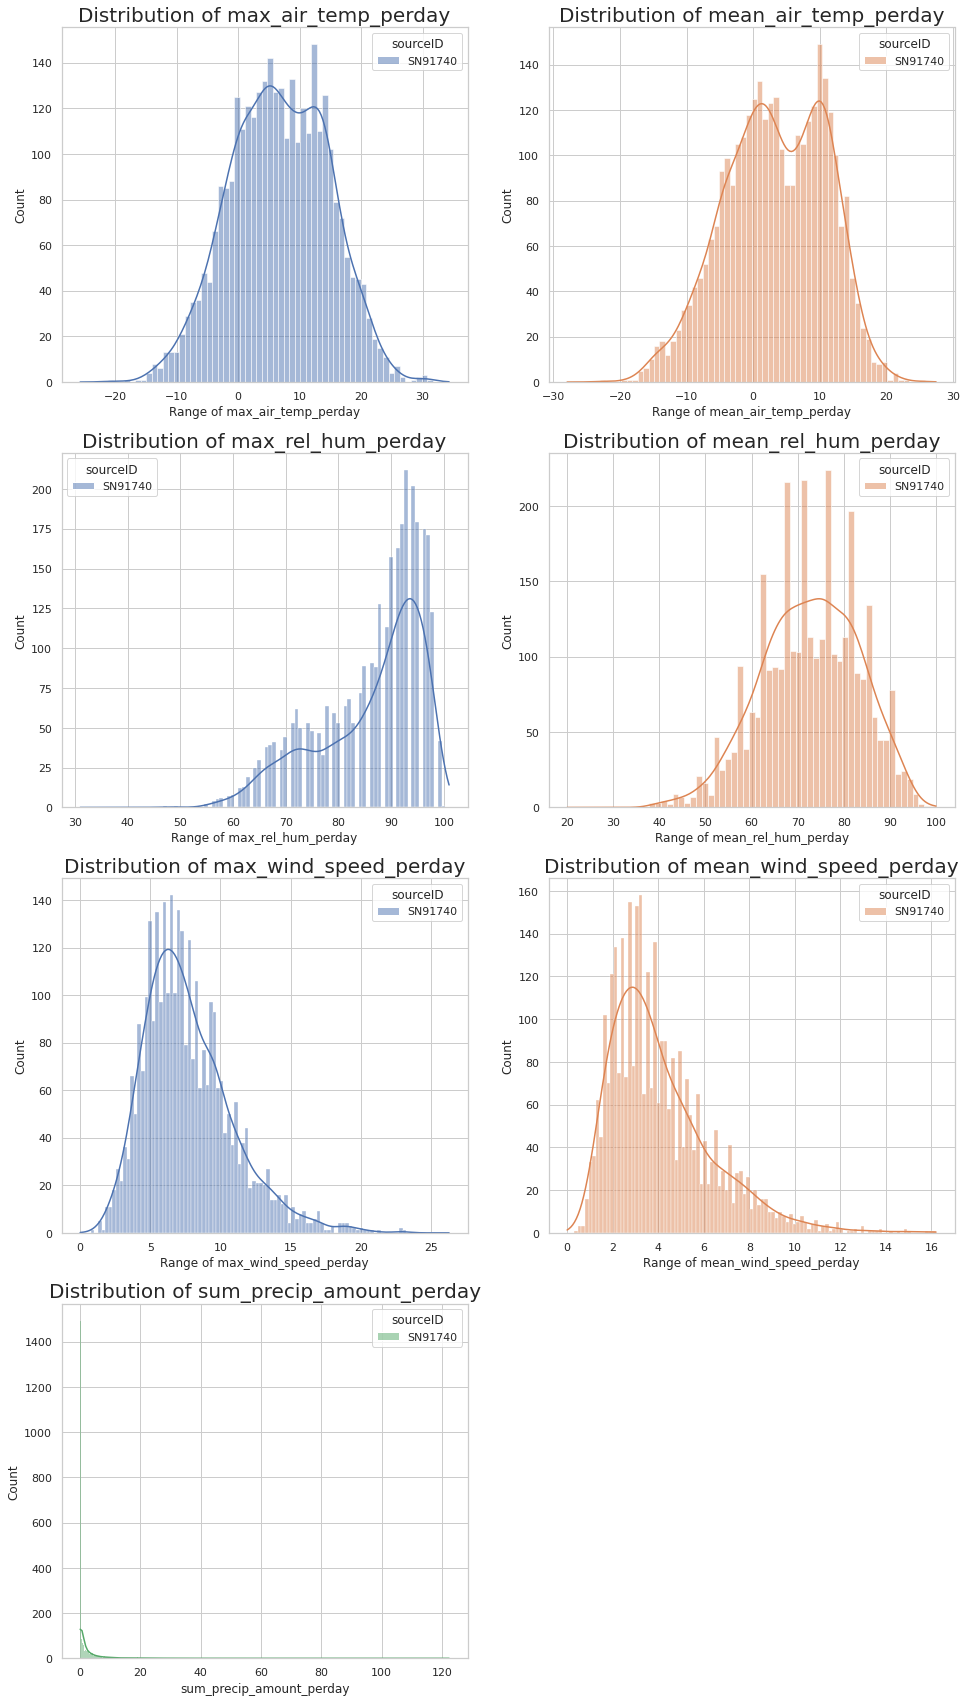

In [98]:
plt.figure(figsize=(16,30))

plt.subplot(4, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_air_temp_perday', kde=True, hue=('sourceID'), hue_order=['SN91740'])
plt.title('Distribution of max_air_temp_perday', fontsize = 20)
plt.xlabel('Range of max_air_temp_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_air_temp_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN91740'], palette=["C1"])
plt.title('Distribution of mean_air_temp_perday', fontsize = 20)
plt.xlabel('Range of mean_air_temp_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 3)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_rel_hum_perday', kde=True, hue=('sourceID'), hue_order=['SN91740'])
plt.title('Distribution of max_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of max_rel_hum_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 4)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_rel_hum_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN91740'], palette=["C1"])
plt.title('Distribution of mean_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of mean_rel_hum_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 5)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_wind_speed_perday', kde=True, hue=('sourceID'), hue_order=['SN91740'])
plt.title('Distribution of max_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of max_wind_speed_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 6)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_wind_speed_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN91740'], palette=["C1"])
plt.title('Distribution of mean_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of mean_wind_speed_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 7)
sns.histplot(meteo, x='sum_precip_amount_perday', kde=True, hue=('sourceID'), hue_order=['SN91740'], palette=["C2"])
plt.title('Distribution of sum_precip_amount_perday', fontsize = 20)

plt.show()

### **1.4.1 Distribuzioni per SN61630**

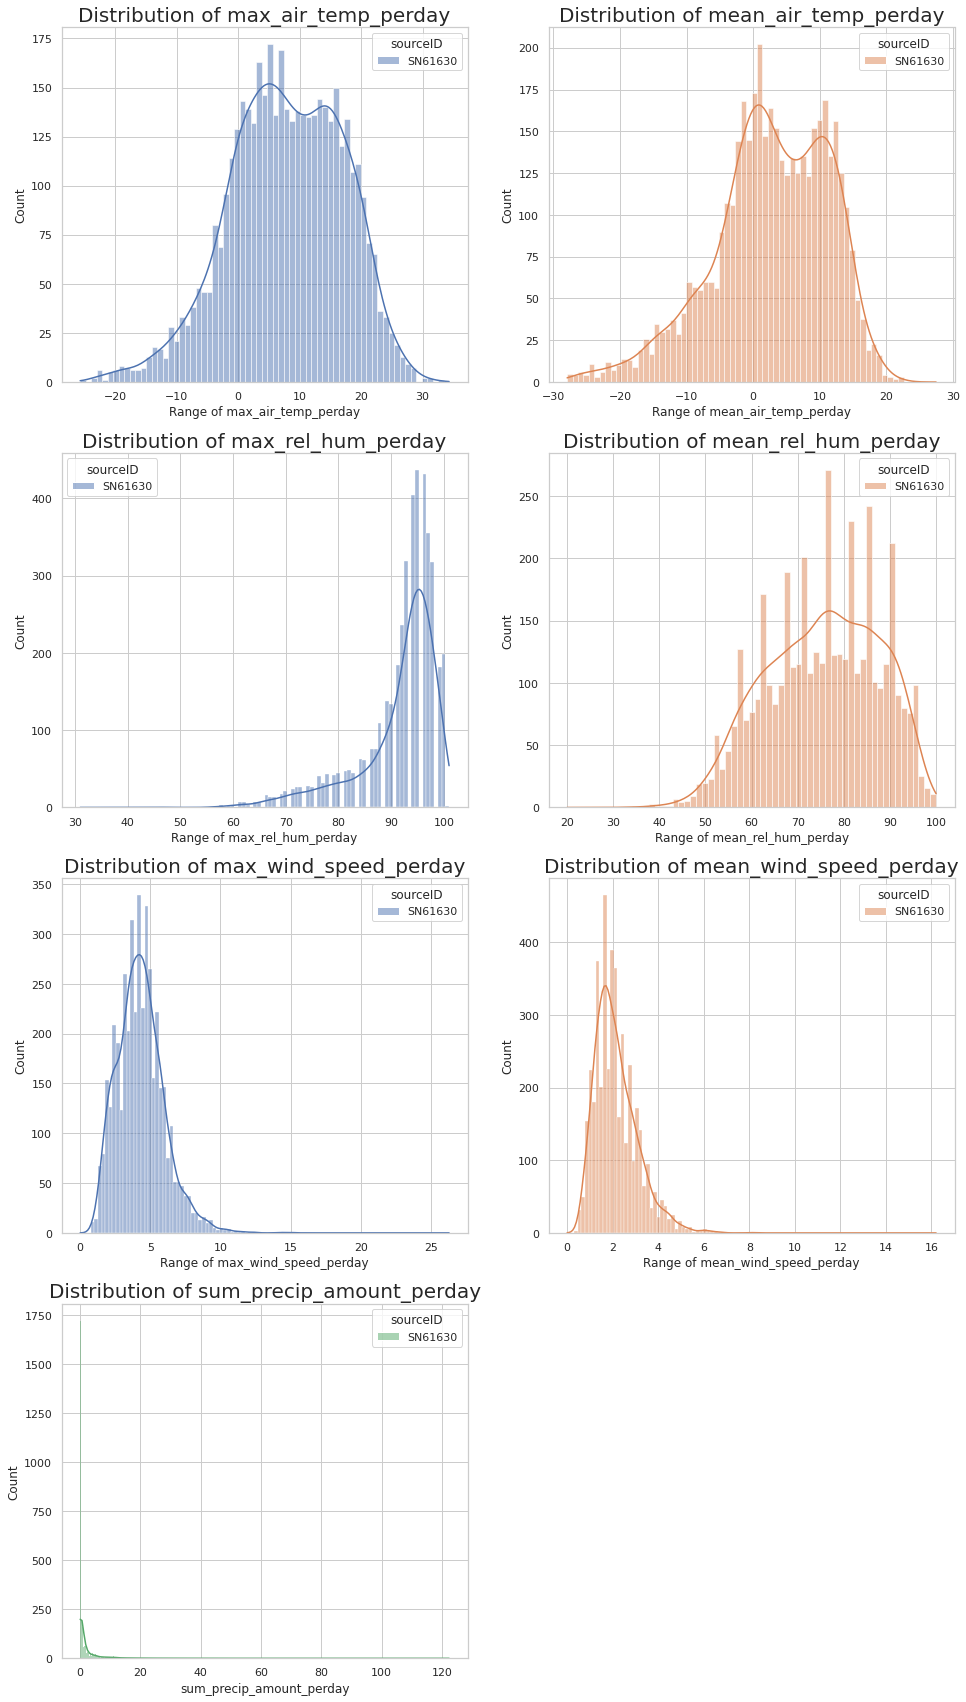

In [99]:
plt.figure(figsize=(16,30))

plt.subplot(4, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_air_temp_perday', kde=True, hue=('sourceID'), hue_order=['SN61630'])
plt.title('Distribution of max_air_temp_perday', fontsize = 20)
plt.xlabel('Range of max_air_temp_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_air_temp_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN61630'], palette=["C1"])
plt.title('Distribution of mean_air_temp_perday', fontsize = 20)
plt.xlabel('Range of mean_air_temp_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 3)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_rel_hum_perday', kde=True, hue=('sourceID'), hue_order=['SN61630'])
plt.title('Distribution of max_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of max_rel_hum_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 4)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_rel_hum_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN61630'], palette=["C1"])
plt.title('Distribution of mean_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of mean_rel_hum_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 5)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_wind_speed_perday', kde=True, hue=('sourceID'), hue_order=['SN61630'])
plt.title('Distribution of max_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of max_wind_speed_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 6)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_wind_speed_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN61630'], palette=["C1"])
plt.title('Distribution of mean_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of mean_wind_speed_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 7)
sns.histplot(meteo, x='sum_precip_amount_perday', kde=True, hue=('sourceID'), hue_order=['SN61630'], palette=["C2"])
plt.title('Distribution of sum_precip_amount_perday', fontsize = 20)

plt.show()

### **1.4.1 Distribuzioni per SN32240**

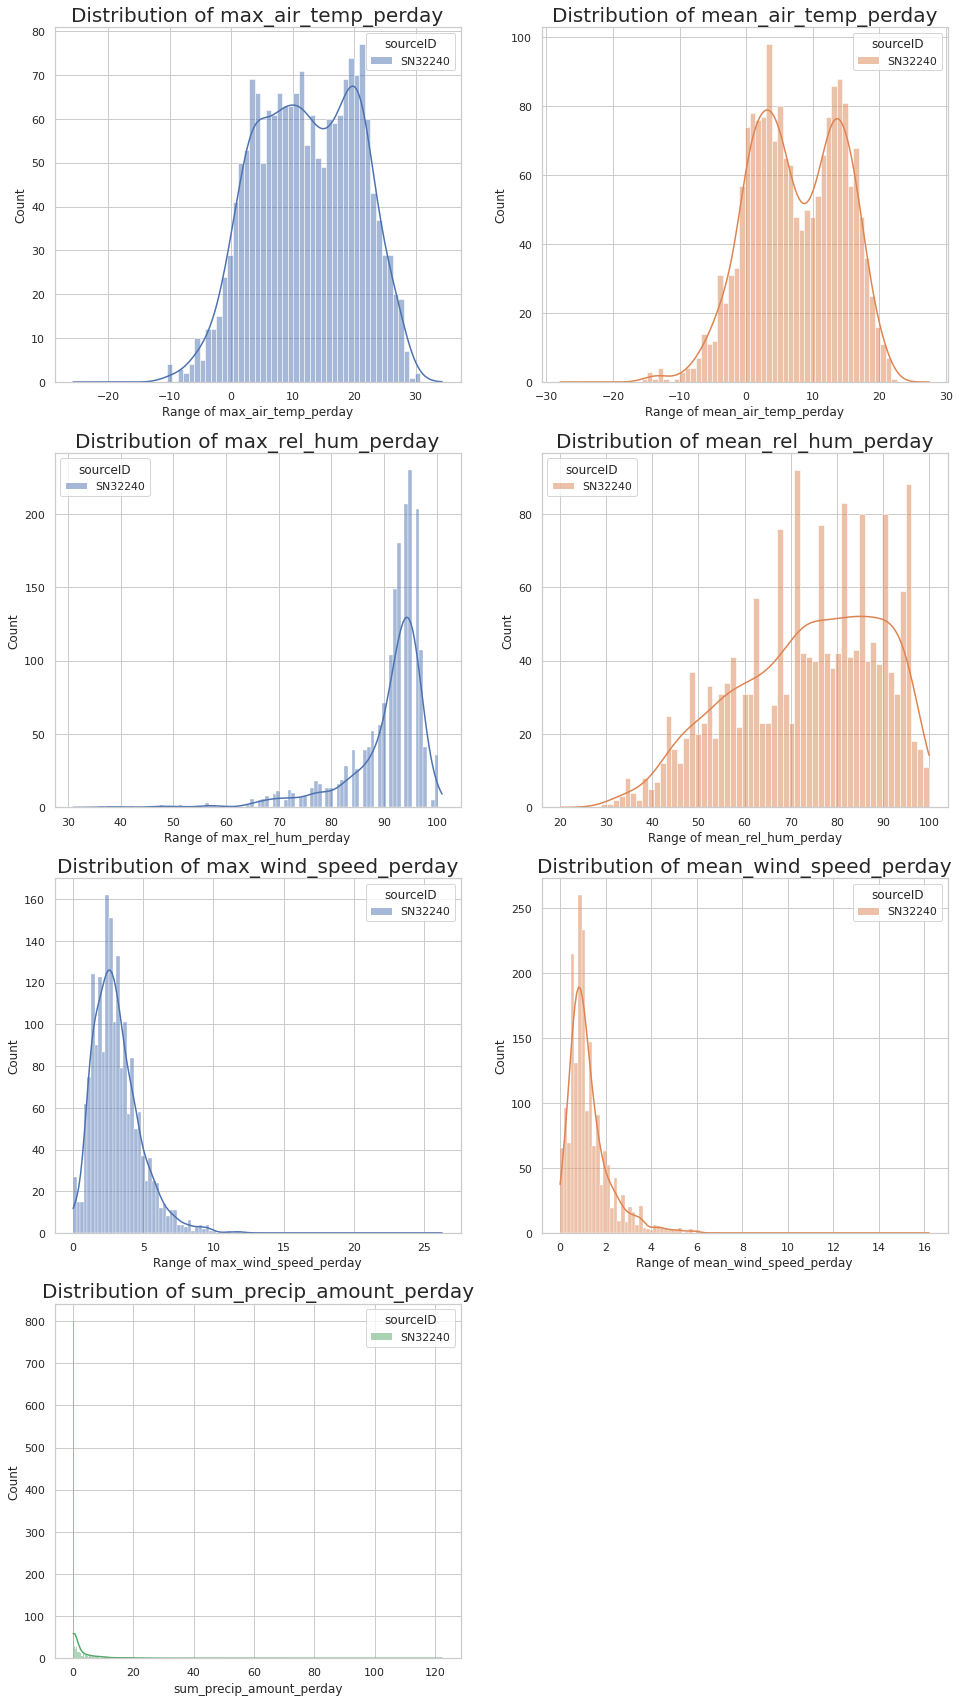

In [100]:
plt.figure(figsize=(16,30))

plt.subplot(4, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_air_temp_perday', kde=True, hue=('sourceID'), hue_order=['SN32240'])
plt.title('Distribution of max_air_temp_perday', fontsize = 20)
plt.xlabel('Range of max_air_temp_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_air_temp_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN32240'], palette=["C1"])
plt.title('Distribution of mean_air_temp_perday', fontsize = 20)
plt.xlabel('Range of mean_air_temp_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 3)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_rel_hum_perday', kde=True, hue=('sourceID'), hue_order=['SN32240'])
plt.title('Distribution of max_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of max_rel_hum_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 4)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_rel_hum_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN32240'], palette=["C1"])
plt.title('Distribution of mean_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of mean_rel_hum_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 5)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_wind_speed_perday', kde=True, hue=('sourceID'), hue_order=['SN32240'])
plt.title('Distribution of max_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of max_wind_speed_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 6)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_wind_speed_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN32240'], palette=["C1"])
plt.title('Distribution of mean_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of mean_wind_speed_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 7)
sns.histplot(meteo, x='sum_precip_amount_perday', kde=True, hue=('sourceID'), hue_order=['SN32240'], palette=["C2"])
plt.title('Distribution of sum_precip_amount_perday', fontsize = 20)

plt.show()

### **1.4.1 Distribuzioni per SN16400**

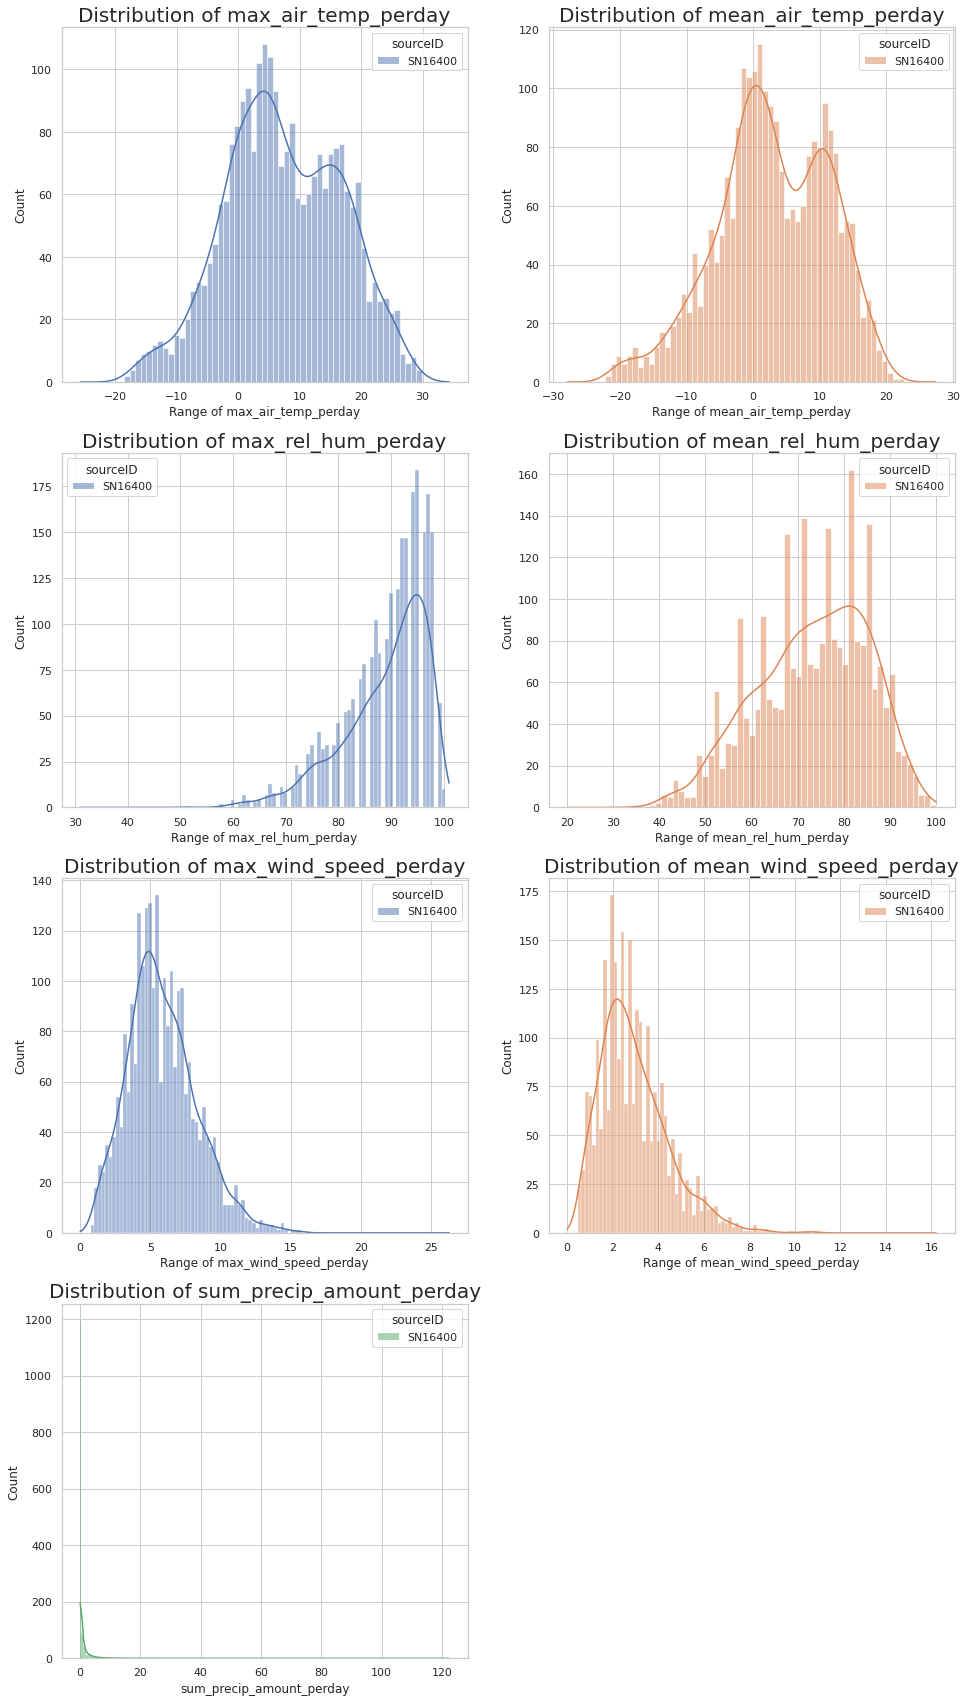

In [101]:
plt.figure(figsize=(16,30))

plt.subplot(4, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_air_temp_perday', kde=True, hue=('sourceID'), hue_order=['SN16400'])
plt.title('Distribution of max_air_temp_perday', fontsize = 20)
plt.xlabel('Range of max_air_temp_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_air_temp_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN16400'], palette=["C1"])
plt.title('Distribution of mean_air_temp_perday', fontsize = 20)
plt.xlabel('Range of mean_air_temp_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 3)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_rel_hum_perday', kde=True, hue=('sourceID'), hue_order=['SN16400'])
plt.title('Distribution of max_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of max_rel_hum_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 4)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_rel_hum_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN16400'], palette=["C1"])
plt.title('Distribution of mean_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of mean_rel_hum_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 5)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_wind_speed_perday', kde=True, hue=('sourceID'), hue_order=['SN16400'])
plt.title('Distribution of max_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of max_wind_speed_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 6)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_wind_speed_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN16400'], palette=["C1"])
plt.title('Distribution of mean_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of mean_wind_speed_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 7)
sns.histplot(meteo, x='sum_precip_amount_perday', kde=True, hue=('sourceID'), hue_order=['SN16400'], palette=["C2"])
plt.title('Distribution of sum_precip_amount_perday', fontsize = 20)

plt.show()

### **1.4.1 Distribuzioni per SN50110**

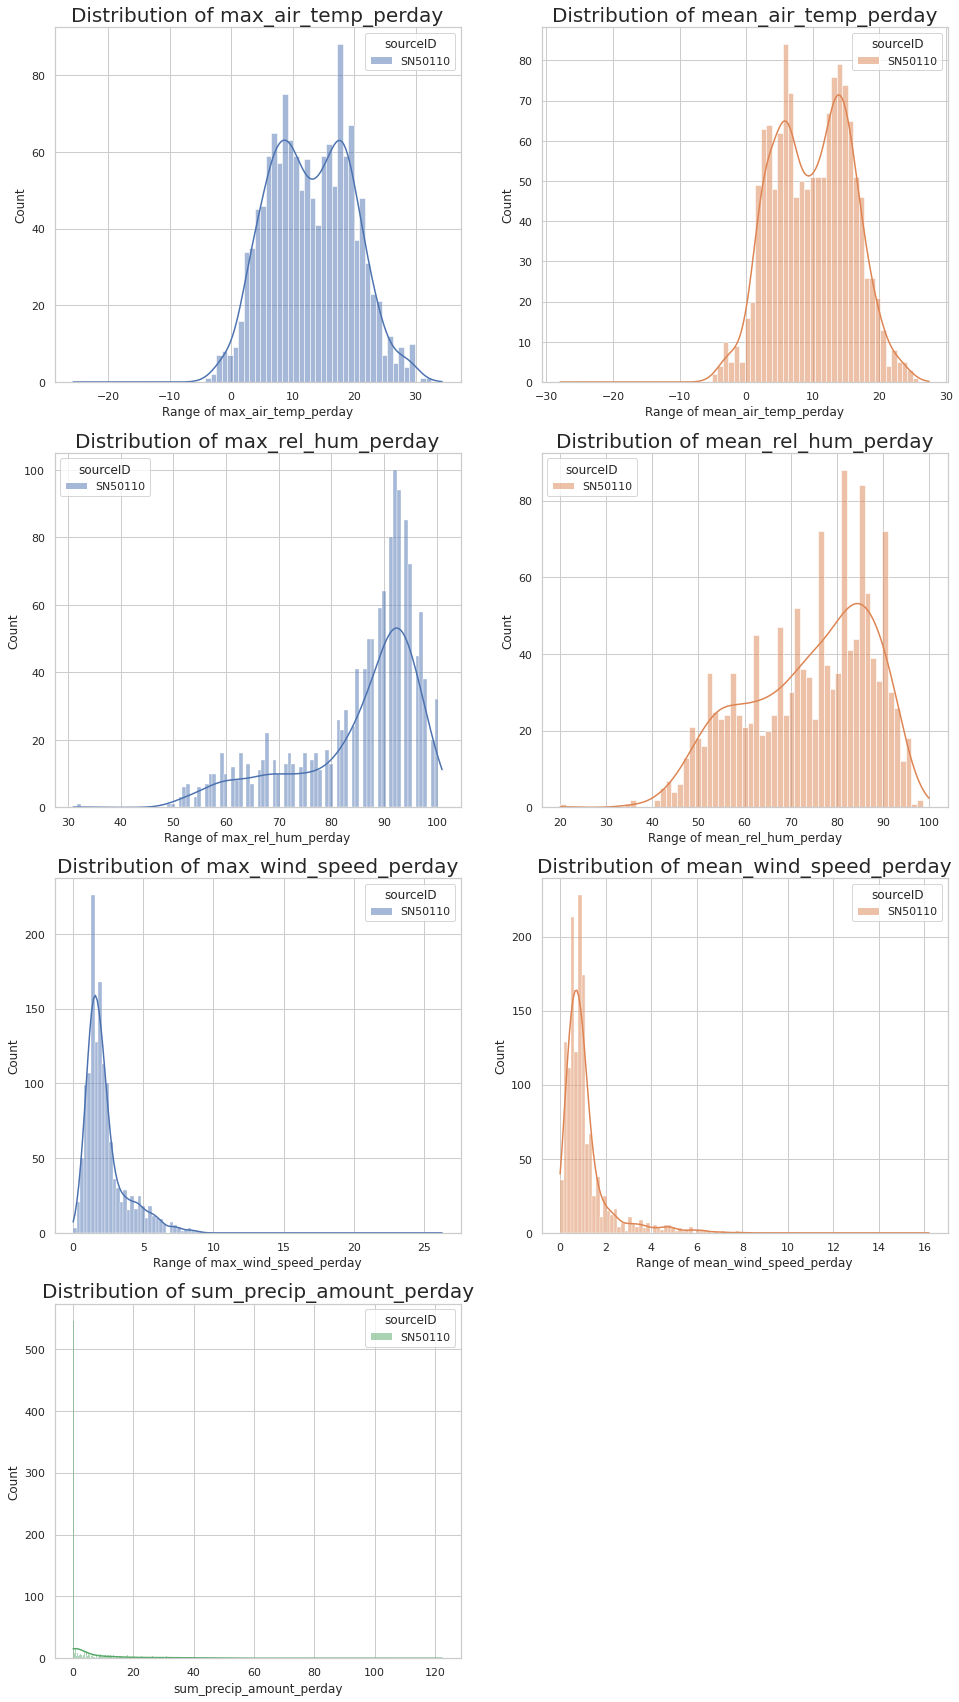

In [102]:
plt.figure(figsize=(16,30))

plt.subplot(4, 2, 1)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_air_temp_perday', kde=True, hue=('sourceID'), hue_order=['SN50110'])
plt.title('Distribution of max_air_temp_perday', fontsize = 20)
plt.xlabel('Range of max_air_temp_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 2)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_air_temp_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN50110'], palette=["C1"])
plt.title('Distribution of mean_air_temp_perday', fontsize = 20)
plt.xlabel('Range of mean_air_temp_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 3)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_rel_hum_perday', kde=True, hue=('sourceID'), hue_order=['SN50110'])
plt.title('Distribution of max_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of max_rel_hum_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 4)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_rel_hum_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN50110'], palette=["C1"])
plt.title('Distribution of mean_rel_hum_perday', fontsize = 20)
plt.xlabel('Range of mean_rel_hum_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 5)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='max_wind_speed_perday', kde=True, hue=('sourceID'), hue_order=['SN50110'])
plt.title('Distribution of max_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of max_wind_speed_perday')
plt.ylabel('Count')


plt.subplot(4, 2, 6)
sns.set(style = 'whitegrid')
sns.histplot(meteo, x='mean_wind_speed_perday', color = 'red', kde=True, hue=('sourceID'), hue_order=['SN50110'], palette=["C1"])
plt.title('Distribution of mean_wind_speed_perday', fontsize = 20)
plt.xlabel('Range of mean_wind_speed_perday')
plt.ylabel('Count')

plt.subplot(4, 2, 7)
sns.histplot(meteo, x='sum_precip_amount_perday', kde=True, hue=('sourceID'), hue_order=['SN50110'], palette=["C2"])
plt.title('Distribution of sum_precip_amount_perday', fontsize = 20)

plt.show()

## **1.5 Andamento Temporale**

Text(0.5, 1.0, 'Mean Air Temperature')

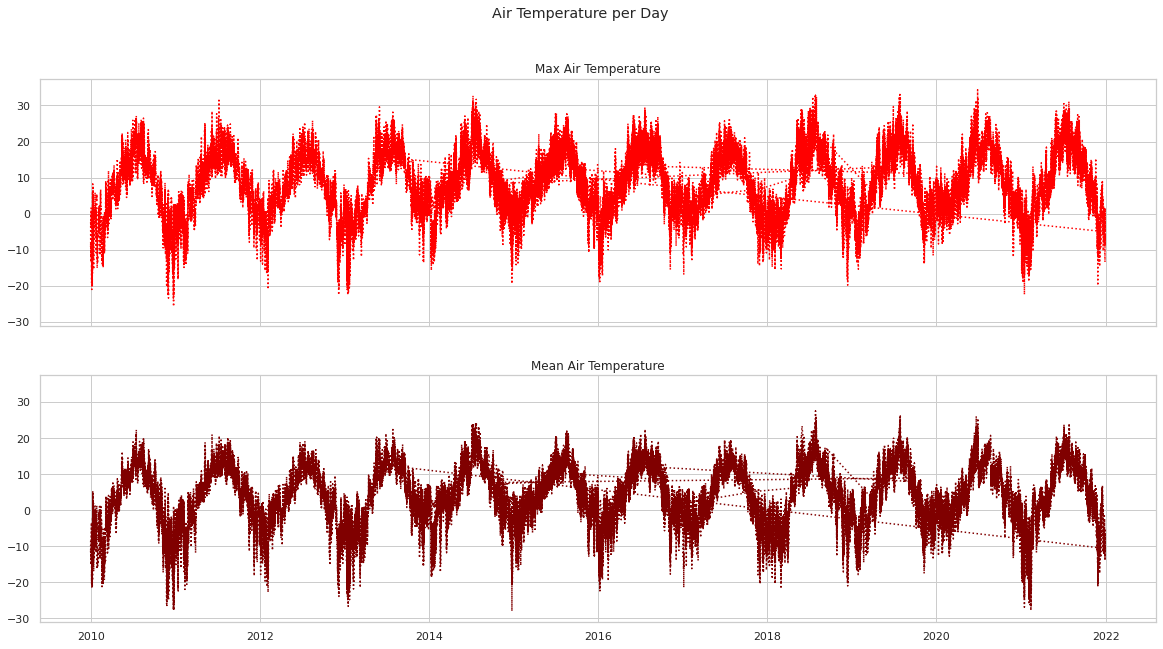

In [103]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Air Temperature per Day')
axs[0].plot(meteo.Date, meteo.max_air_temp_perday, color='red', ls='dotted')
axs[0].set_title("Max Air Temperature")
axs[1].plot(meteo.Date, meteo.mean_air_temp_perday, color='maroon', ls='dotted')
axs[1].set_title("Mean Air Temperature")

Text(0.5, 1.0, 'Mean Relative Humidity')

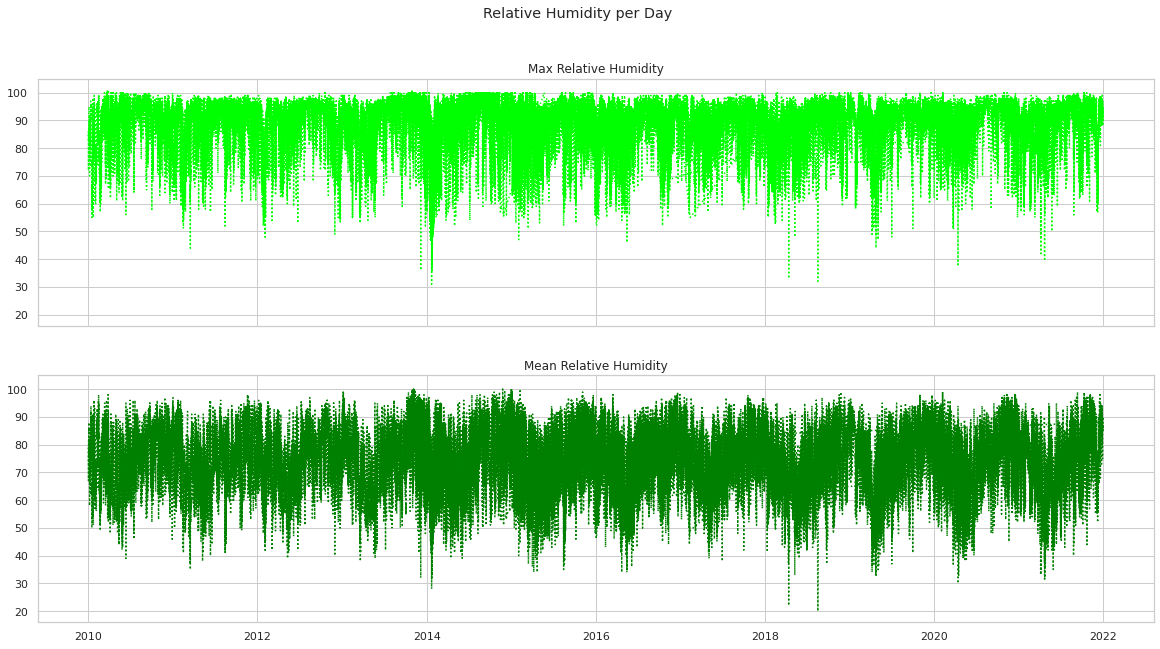

In [104]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Relative Humidity per Day')
axs[0].plot(meteo.Date, meteo.max_rel_hum_perday, color='lime', ls='dotted')
axs[0].set_title("Max Relative Humidity")
axs[1].plot(meteo.Date, meteo.mean_rel_hum_perday, color='green', ls='dotted')
axs[1].set_title("Mean Relative Humidity")

Text(0.5, 1.0, 'Mean Wind Speed')

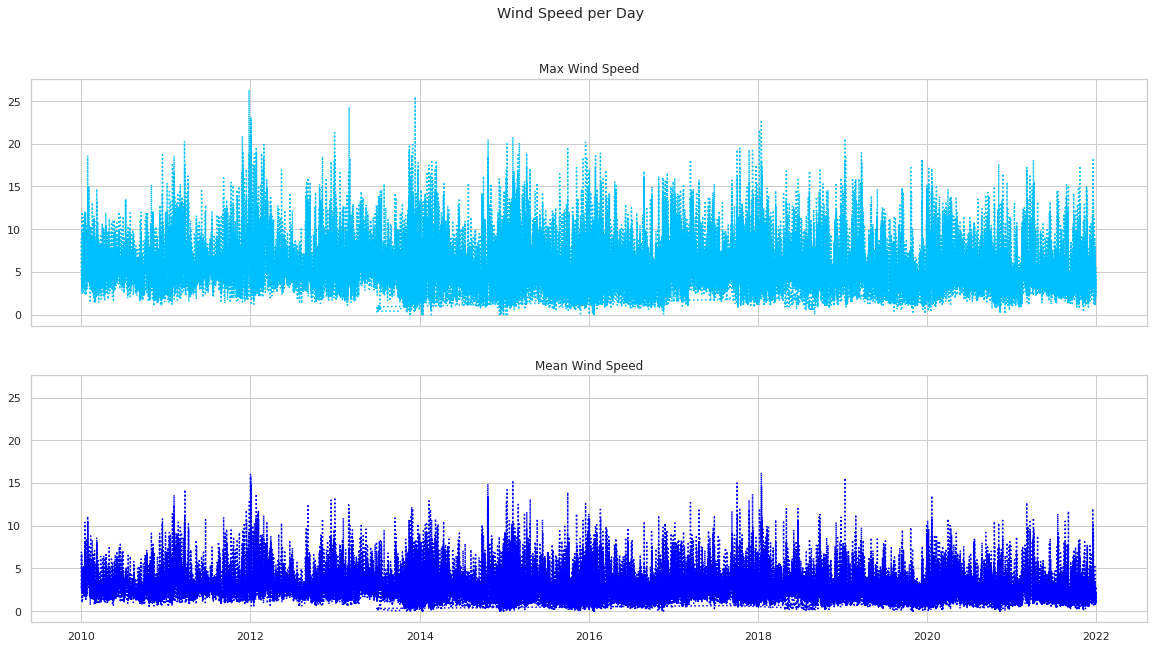

In [105]:
fig, axs = plt.subplots(2, sharex=True, sharey=True, figsize = (20,10))
fig.suptitle('Wind Speed per Day')
axs[0].plot(meteo.Date, meteo.max_wind_speed_perday, color='deepskyblue', ls='dotted')
axs[0].set_title("Max Wind Speed")
axs[1].plot(meteo.Date, meteo.mean_wind_speed_perday, color='blue', ls='dotted')
axs[1].set_title("Mean Wind Speed")

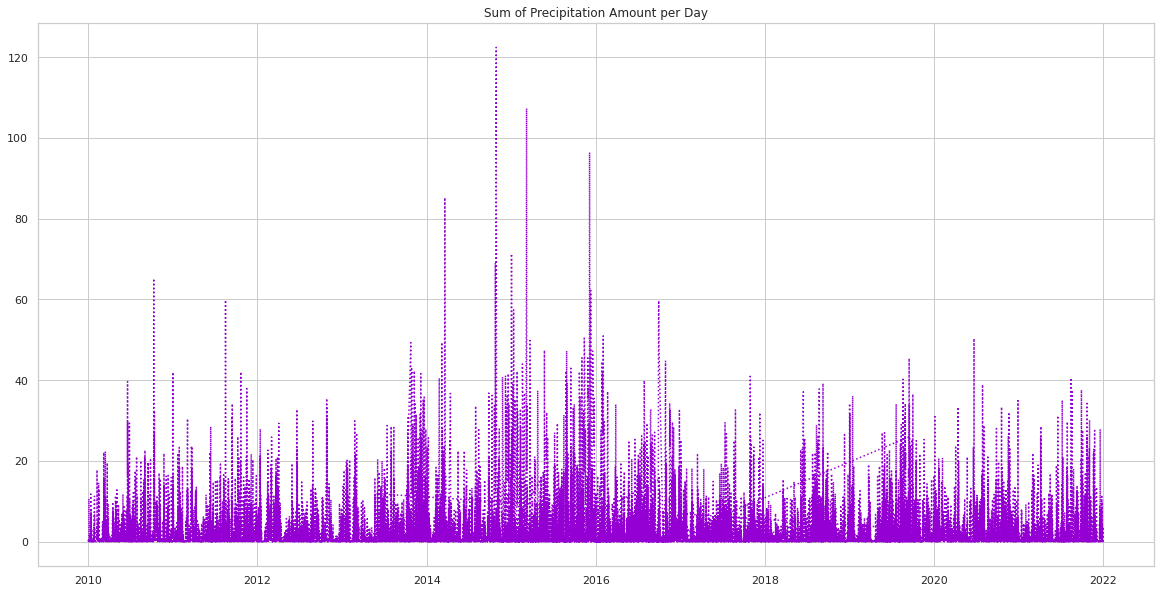

In [106]:
plt.figure(figsize=(20, 10))
plt.title('Sum of Precipitation Amount per Day')
plt.plot(meteo.Date, meteo.sum_precip_amount_perday, color='darkviolet', ls='dotted')
plt.show()

## **1.6 Correlazioni**

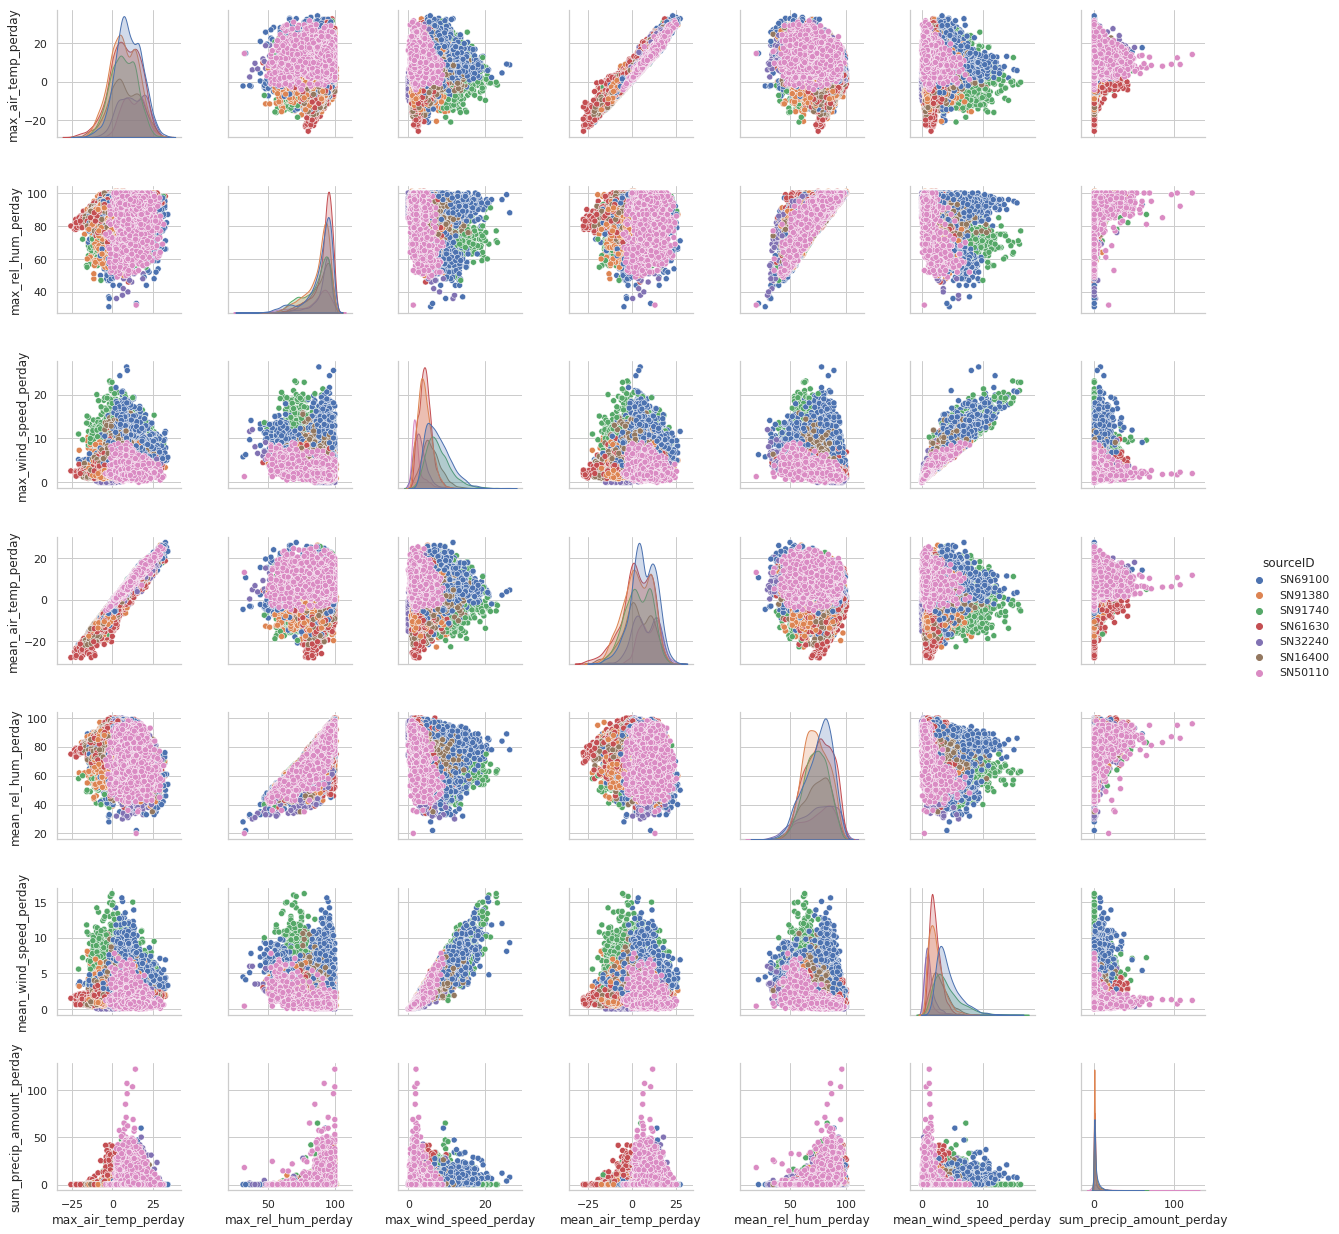

In [ ]:
sns.pairplot(meteo.drop(['Latitude', 'Longitude', 'Year', 'Month', 'Day'], axis=1), hue='sourceID')

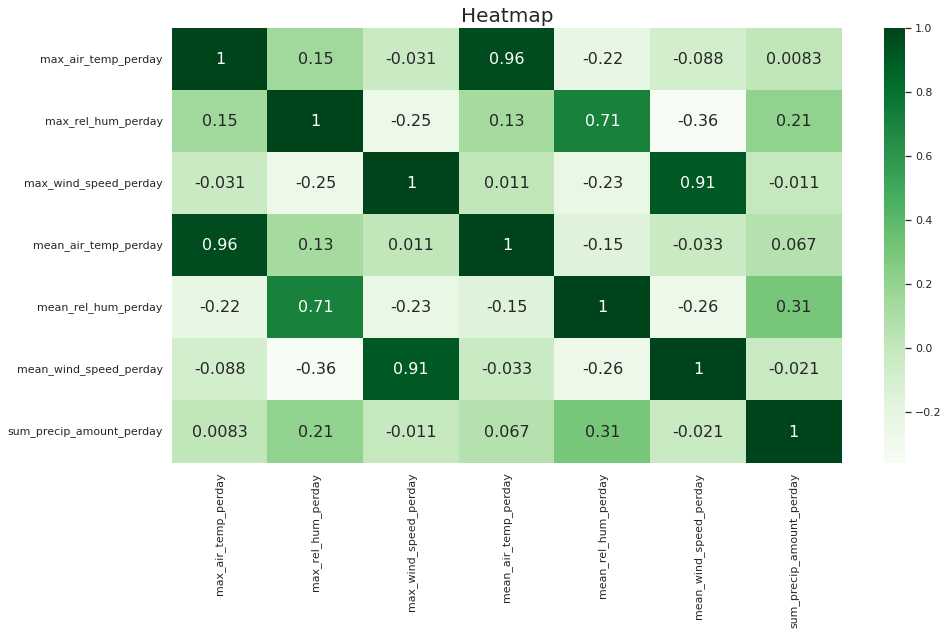

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(meteo.drop(['Latitude', 'Longitude', 'Year', 'Month', 'Day'], axis=1).corr(), cmap = 'Greens', annot = True, annot_kws={"fontsize": 16})
plt.title('Heatmap', fontsize = 20)
plt.show()

## **1.7 Altro**

In [ ]:
meteo.loc[meteo['max_air_temp_perday'].idxmax()]

sourceID                                    SN69100
Latitude                                    63.4597
Longitude                                   10.9305
max_air_temp_perday                            34.3
max_rel_hum_perday                             87.0
max_wind_speed_perday                           5.7
mean_air_temp_perday                          23.25
mean_rel_hum_perday                            54.0
mean_wind_speed_perday                          3.3
sum_precip_amount_perday                        0.0
Day                                              27
Month                                             6
Year                                           2020
geometry                    POINT (10.9305 63.4597)
Date                            2020-06-27 00:00:00
Name: 176214, dtype: object

In [ ]:
meteo.loc[meteo['max_air_temp_perday'].idxmin()]

sourceID                                SN61630
Latitude                                62.2583
Longitude                                   8.2
max_air_temp_perday                       -25.7
max_rel_hum_perday                         80.0
max_wind_speed_perday                       2.6
mean_air_temp_perday                      -27.8
mean_rel_hum_perday                        75.0
mean_wind_speed_perday                      1.5
sum_precip_amount_perday                    0.0
Day                                          25
Month                                        12
Year                                       2010
geometry                    POINT (8.2 62.2583)
Date                        2010-12-25 00:00:00
Name: 16500, dtype: object

In [ ]:
meteo.loc[meteo['max_rel_hum_perday'].idxmax()]

sourceID                                SN61630
Latitude                                62.2583
Longitude                                   8.2
max_air_temp_perday                         7.1
max_rel_hum_perday                        101.0
max_wind_speed_perday                       4.1
mean_air_temp_perday                      -0.05
mean_rel_hum_perday                        75.0
mean_wind_speed_perday                      1.7
sum_precip_amount_perday                   0.95
Day                                          24
Month                                         3
Year                                       2010
geometry                    POINT (8.2 62.2583)
Date                        2010-03-24 00:00:00
Name: 3804, dtype: object

In [ ]:
meteo.loc[meteo['max_wind_speed_perday'].idxmax()]

sourceID                                    SN69100
Latitude                                    63.4597
Longitude                                   10.9305
max_air_temp_perday                             8.8
max_rel_hum_perday                             88.0
max_wind_speed_perday                          26.3
mean_air_temp_perday                           4.65
mean_rel_hum_perday                            78.0
mean_wind_speed_perday                          9.3
sum_precip_amount_perday                        7.8
Day                                              26
Month                                            12
Year                                           2011
geometry                    POINT (10.9305 63.4597)
Date                            2011-12-26 00:00:00
Name: 33338, dtype: object

In [ ]:
meteo.loc[meteo['sum_precip_amount_perday'].idxmax()]

sourceID                                   SN50110
Latitude                                   60.3372
Longitude                                   6.2175
max_air_temp_perday                           14.2
max_rel_hum_perday                           100.0
max_wind_speed_perday                          2.0
mean_air_temp_perday                         11.75
mean_rel_hum_perday                           96.0
mean_wind_speed_perday                         1.2
sum_precip_amount_perday                     122.4
Day                                             28
Month                                           10
Year                                          2014
geometry                    POINT (6.2175 60.3372)
Date                           2014-10-28 00:00:00
Name: 229761, dtype: object